In [1]:
import pandas as pd
from variables import *
import itertools
import dataframe_image as dfi
from statistics import mean
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


%load_ext rpy2.ipython

The table should contain the following:
- pop1
- pop2
- intersection mean fragment length
- intersection sequence length
- intersection number of fragments
- ind1
- ind2
- artificial genome 1 mean fragment length
- artificial genome 2 mean fragment length
- artificial genome 1 sequence length
- artificial genome 2 sequence length
- artificial genome 1 number of fragments
- artificial genome 2 number of fragments


In [2]:
pop1_list = []
pop2_list = []
nean_int_mean_frag_length = []
nean_int_total_seq_length = []
nean_int_number_of_frags = []
nean_ind1_list = []
nean_ind2_list = []
nean_art1_mean_frag_length = []
nean_art1_total_seq_length = []
nean_art1_number_of_frags = []
nean_art2_mean_frag_length = []
nean_art2_total_seq_length = []
nean_art2_number_of_frags = []
deni_int_mean_frag_length = []
deni_int_total_seq_length = []
deni_int_number_of_frags = []
deni_ind1_list = []
deni_ind2_list = []
deni_art1_mean_frag_length = []
deni_art1_total_seq_length = []
deni_art1_number_of_frags = []
deni_art2_mean_frag_length = []
deni_art2_total_seq_length = []
deni_art2_number_of_frags = []

for i in range(len(lpopulat)):
    for j in range(i, len(lpopulat)):
        pop1 = lpopulat[i]
        pop2 = lpopulat[j]
        pop1_list.append(pop1)
        pop2_list.append(pop2)
        nean_int_data = pd.read_csv("../script_results/Neanderthal/intersection/int_HGDP_{}_Neanderthal_HGDP_{}_Neanderthal_0.5.txt".format(pop1,pop2), sep='\t', header=None)
        nean_int_data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
        nean_int_mean_frag_length.append((nean_int_data['end']-nean_int_data['start']).mean())
        nean_int_total_seq_length.append((nean_int_data['end']-nean_int_data['start']+1).sum())
        nean_int_number_of_frags.append(len(nean_int_data))
        nean_art1_data = pd.read_csv("../script_results/Neanderthal/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop1), sep='\t', header=None)
        nean_art1_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        nean_art2_data = pd.read_csv("../script_results/Neanderthal/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop2), sep='\t', header=None)
        nean_art2_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        nean_ind1_list.append(nean_art1_data['ind'].nunique())
        nean_ind2_list.append(nean_art2_data['ind'].nunique())
        nean_art1_mean_frag_length.append((nean_art1_data['end']-nean_art1_data['start']).mean())
        nean_art2_mean_frag_length.append((nean_art2_data['end']-nean_art2_data['start']).mean())
        nean_art1_total_seq_length.append((nean_art1_data['end']-nean_art1_data['start']).sum())
        nean_art2_total_seq_length.append((nean_art2_data['end']-nean_art2_data['start']).sum())
        nean_art1_number_of_frags.append(len(nean_art1_data))
        nean_art2_number_of_frags.append(len(nean_art2_data))
        deni_int_data = pd.read_csv("../script_results/Denisova/intersection/int_HGDP_{}_Denisova_HGDP_{}_Denisova_0.5.txt".format(pop1,pop2), sep='\t', header=None)
        deni_int_data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
        deni_int_mean_frag_length.append((deni_int_data['end']-deni_int_data['start']).mean())
        deni_int_total_seq_length.append((deni_int_data['end']-deni_int_data['start']+1).sum())
        deni_int_number_of_frags.append(len(deni_int_data))
        deni_art1_data = pd.read_csv("../script_results/Denisova/artificialgenomes/art_HGDP_{}_Denisova_0.5.txt".format(pop1), sep='\t', header=None)
        deni_art1_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        deni_art2_data = pd.read_csv("../script_results/Denisova/artificialgenomes/art_HGDP_{}_Denisova_0.5.txt".format(pop2), sep='\t', header=None)
        deni_art2_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        deni_ind1_list.append(deni_art1_data['ind'].nunique())
        deni_ind2_list.append(deni_art2_data['ind'].nunique())
        deni_art1_mean_frag_length.append((deni_art1_data['end']-deni_art1_data['start']).mean())
        deni_art2_mean_frag_length.append((deni_art2_data['end']-deni_art2_data['start']).mean())
        deni_art1_total_seq_length.append((deni_art1_data['end']-deni_art1_data['start']).sum())
        deni_art2_total_seq_length.append((deni_art2_data['end']-deni_art2_data['start']).sum())
        deni_art1_number_of_frags.append(len(deni_art1_data))
        deni_art2_number_of_frags.append(len(deni_art2_data))
        
    

In [3]:
summary_table = pd.DataFrame({'pop1':pop1_list,'pop2':pop2_list,'nean_int_mean_frag_len':nean_int_mean_frag_length,'nean_int_total_seq_len':nean_int_total_seq_length,'nean_int_n_frags':nean_int_number_of_frags,'nean_n_ind1':nean_ind1_list,'nean_art1_mean_frag_len':nean_art1_mean_frag_length,'nean_art1_total_seq_len':nean_art1_total_seq_length,'nean_art1_n_frags':nean_art1_number_of_frags,'nean_n_ind2':nean_ind2_list,'nean_art2_mean_frag_len':nean_art2_mean_frag_length,'nean_art2_total_seq_len':nean_art2_total_seq_length,'nean_art2_n_frags':nean_art2_number_of_frags,'deni_int_mean_frag_len':deni_int_mean_frag_length,'deni_int_total_seq_len':deni_int_total_seq_length,'deni_int_n_frags':deni_int_number_of_frags,'deni_n_ind1':deni_ind1_list,'deni_art1_mean_frag_len':deni_art1_mean_frag_length,'deni_art1_total_seq_len':deni_art1_total_seq_length,'deni_art1_n_frags':deni_art1_number_of_frags,'deni_n_ind2':deni_ind2_list,'deni_art2_mean_frag_len':deni_art2_mean_frag_length,'deni_art2_total_seq_len':deni_art2_total_seq_length,'deni_art2_n_frags':deni_art2_number_of_frags})
summary_table

pop1             pop2  nean_int_mean_frag_len  \
0      Burusho          Burusho            83004.237288   
1      Burusho           Hazara            52720.891629   
2      Burusho            Uygur            54133.176885   
3      Burusho     Bougainville            52949.657869   
4      Burusho  PapuanHighlands            50631.277813   
...        ...              ...                     ...   
1123    Pathan           Sindhi            54229.712859   
1124    Pathan         Mozabite            53491.946309   
1125    Sindhi           Sindhi            83600.000000   
1126    Sindhi         Mozabite            54545.734841   
1127  Mozabite         Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           24   
2                  184543409              3409           24   
3                  108337046              2046           24   
4                   79644573              1573           24   
...                      ...               ...          ...   
1123               260632806              4806           24   
1124               159408980              2980           24   
1125               469837620              5620           24   
1126               159221919              2919           24   
1127               299979459              3459           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                83004.237288                470136000               5664   
2                83004.237288                470136000               5664   
3                83004.237288                470136000               5664   
4                83004.237288                470136000               5664   
...                       ...                      ...                ...   
1123             83494.323144                478005000               5725   
1124             83494.323144                478005000               5725   
1125             83600.000000                469832000               5620   
1126             83600.000000                469832000               5620   
1127             86723.330442                299976000               3459   

      nean_n_ind2  ...  deni_int_total_seq_len  deni_int_n_frags  deni_n_ind1  \
0              24  ...                53873650               650           24   
1              19  ...                12028211               211           24   
2              10  ...                10204157               157           24   
3              11  ...                 8303166               166           24   
4               9  ...                 6742151               151           24   
...           ...  ...                     ...               ...          ...   
1123           24  ...                18207333               333           24   
1124           27  ...                 4803094                94           24   
1125           24  ...                52755652               652           24   
1126           27  ...                 5016092                92           24   
1127           27  ...                13595182               182           26   

      deni_art1_mean_frag_len  deni_art1_total_seq_len  deni_art1_n_frags  \
0                82881.538462                 53873000                650   
1                82881.538462                 53873000                650   
2                82881.538462                 53873000                650   
3                82881.538462                 53873000                650   
4                82881.538462                 53873000                650   
...                       ...                      ...                ...   
1123             78737.785016                 48345000                614   
1124             78737.785016 

In [4]:
div_neanderthal = pd.read_csv("../script_results/tables/div_Neanderthal_all.txt",sep='\t', header=None)
div_neanderthal.columns = ['pop1','pop2','mpd_neanderthal']
div_neanderthal = div_neanderthal.groupby(['pop1','pop2'])['mpd_neanderthal'].sum().reset_index()
div_neanderthal

pop1            pop2  mpd_neanderthal
0     Adygei          Adygei        1164318.0
1     Adygei         Balochi          70815.0
2     Adygei          Basque          62807.0
3     Adygei         Bedouin          75803.5
4     Adygei  BergamoItalian          57944.0
...      ...             ...              ...
2204      Yi          Tuscan          23168.0
2205      Yi           Uygur          50098.0
2206      Yi            Xibo          49453.5
2207      Yi           Yakut          56447.5
2208      Yi              Yi         991869.0

[2209 rows x 3 columns]

In [5]:
m = pd.merge(summary_table,div_neanderthal,on=['pop1','pop2'],how='inner')
m

pop1             pop2  nean_int_mean_frag_len  \
0      Burusho          Burusho            83004.237288   
1      Burusho           Hazara            52720.891629   
2      Burusho            Uygur            54133.176885   
3      Burusho     Bougainville            52949.657869   
4      Burusho  PapuanHighlands            50631.277813   
...        ...              ...                     ...   
1123    Pathan           Sindhi            54229.712859   
1124    Pathan         Mozabite            53491.946309   
1125    Sindhi           Sindhi            83600.000000   
1126    Sindhi         Mozabite            54545.734841   
1127  Mozabite         Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           24   
2                  184543409              3409           24   
3                  108337046              2046           24   
4                   79644573              1573           24   
...                      ...               ...          ...   
1123               260632806              4806           24   
1124               159408980              2980           24   
1125               469837620              5620           24   
1126               159221919              2919           24   
1127               299979459              3459           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                83004.237288                470136000               5664   
2                83004.237288                470136000               5664   
3                83004.237288                470136000               5664   
4                83004.237288                470136000               5664   
...                       ...                      ...                ...   
1123             83494.323144                478005000               5725   
1124             83494.323144                478005000               5725   
1125             83600.000000                469832000               5620   
1126             83600.000000                469832000               5620   
1127             86723.330442                299976000               3459   

      nean_n_ind2  ...  deni_int_n_frags  deni_n_ind1  \
0              24  ...               650           24   
1              19  ...               211           24   
2              10  ...               157           24   
3              11  ...               166           24   
4               9  ...               151           24   
...           ...  ...               ...          ...   
1123           24  ...               333           24   
1124           27  ...                94           24   
1125           24  ...               652           24   
1126           27  ...                92           24   
1127           27  ...               182           26   

      deni_art1_mean_frag_len  deni_art1_total_seq_len  deni_art1_n_frags  \
0                82881.538462                 53873000                650   
1                82881.538462                 53873000                650   
2                82881.538462                 53873000                650   
3                82881.538462                 53873000                650   
4                82881.538462                 53873000                650   
...                       ...                      ...                ...   
1123             78737.785016                 48345000                614   
1124             78737.785016                 48345000                614   
1125             80912.576687                 52755000                652   
1126             80912.576687                 52755000                652   
1127             74697.802198                 13595000                182   

      den

In [6]:
div_whole_genome = pd.read_csv("../script_results/tables/div_Human_all.txt",sep='\t',header=None)
div_whole_genome.columns = ['pop1','pop2','mpd_whole_genome']
div_whole_genome = div_whole_genome.groupby(['pop1','pop2'])['mpd_whole_genome'].sum().reset_index()
div_whole_genome

pop1            pop2  mpd_whole_genome
0     Adygei          Adygei      1.533859e+06
1     Adygei         Balochi      1.627732e+06
2     Adygei          Basque      1.587798e+06
3     Adygei         Bedouin      1.655028e+06
4     Adygei  BergamoItalian      1.588550e+06
...      ...             ...               ...
2204      Yi          Tuscan      1.698609e+06
2205      Yi           Uygur      1.586132e+06
2206      Yi            Xibo      1.495455e+06
2207      Yi           Yakut      1.524570e+06
2208      Yi              Yi      1.397873e+06

[2209 rows x 3 columns]

In [8]:
merged = pd.merge(m,div_whole_genome,on=['pop1','pop2'],how='left')
merged

pop1             pop2  nean_int_mean_frag_len  \
0      Burusho          Burusho            83004.237288   
1      Burusho           Hazara            52720.891629   
2      Burusho            Uygur            54133.176885   
3      Burusho     Bougainville            52949.657869   
4      Burusho  PapuanHighlands            50631.277813   
...        ...              ...                     ...   
1123    Pathan           Sindhi            54229.712859   
1124    Pathan         Mozabite            53491.946309   
1125    Sindhi           Sindhi            83600.000000   
1126    Sindhi         Mozabite            54545.734841   
1127  Mozabite         Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           24   
2                  184543409              3409           24   
3                  108337046              2046           24   
4                   79644573              1573           24   
...                      ...               ...          ...   
1123               260632806              4806           24   
1124               159408980              2980           24   
1125               469837620              5620           24   
1126               159221919              2919           24   
1127               299979459              3459           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                83004.237288                470136000               5664   
2                83004.237288                470136000               5664   
3                83004.237288                470136000               5664   
4                83004.237288                470136000               5664   
...                       ...                      ...                ...   
1123             83494.323144                478005000               5725   
1124             83494.323144                478005000               5725   
1125             83600.000000                469832000               5620   
1126             83600.000000                469832000               5620   
1127             86723.330442                299976000               3459   

      nean_n_ind2  ...  deni_n_ind1  deni_art1_mean_frag_len  \
0              24  ...           24             82881.538462   
1              19  ...           24             82881.538462   
2              10  ...           24             82881.538462   
3              11  ...           24             82881.538462   
4               9  ...           24             82881.538462   
...           ...  ...          ...                      ...   
1123           24  ...           24             78737.785016   
1124           27  ...           24             78737.785016   
1125           24  ...           24             80912.576687   
1126           27  ...           24             80912.576687   
1127           27  ...           26             74697.802198   

      deni_art1_total_seq_len  deni_art1_n_frags  deni_n_ind2  \
0                    53873000                650           24   
1                    53873000                650           19   
2                    53873000                650           10   
3                    53873000                650           11   
4                    53873000                650            9   
...                       ...                ...          ...   
1123                 48345000                614           24   
1124                 48345000                614           26   
1125                 52755000                652           24   
1126                 52755000                652           26   
1127                 13595000                182           26   

      deni_art2_mean_frag_len  deni_art2_total_seq_len  deni_art2_n_f

In [9]:
div_denisova = pd.read_csv("../script_results/tables/div_Denisova_all.txt",sep='\t',header=None)
div_denisova.columns = ['pop1','pop2','mpd_denisova']
div_denisova = div_denisova.groupby(['pop1','pop2'])['mpd_denisova'].sum().reset_index()
div_denisova

pop1            pop2  mpd_denisova
0     Adygei          Adygei       66996.0
1     Adygei         Balochi        2646.5
2     Adygei          Basque        2358.5
3     Adygei         Bedouin        2385.0
4     Adygei  BergamoItalian        1935.0
...      ...             ...           ...
2204      Yi          Tuscan        1211.0
2205      Yi           Uygur        3953.5
2206      Yi            Xibo        4522.0
2207      Yi           Yakut        4987.0
2208      Yi              Yi       98878.0

[2209 rows x 3 columns]

In [10]:
merged2 = pd.merge(merged,div_denisova,on=['pop1','pop2'],how='left')
#merged2['div_neanderthal'] = merged2['mpd_neanderthal']/merged2['nean_int_total_seq_len']
#merged2['div_whole_genome'] = merged2['mpd_whole_genome']/2252286208
#merged2['div_denisova'] = merged2['mpd_denisova']/merged2['deni_int_total_seq_len']
#merged2['norm_div_neanderthal'] = zscore(merged2['div_neanderthal'])
#merged2['norm_div_whole_genome'] = zscore(merged2['div_whole_genome'])
#merged2['norm_div_denisova'] = zscore(merged2['div_denisova'])
merged2

pop1             pop2  nean_int_mean_frag_len  \
0      Burusho          Burusho            83004.237288   
1      Burusho           Hazara            52720.891629   
2      Burusho            Uygur            54133.176885   
3      Burusho     Bougainville            52949.657869   
4      Burusho  PapuanHighlands            50631.277813   
...        ...              ...                     ...   
1123    Pathan           Sindhi            54229.712859   
1124    Pathan         Mozabite            53491.946309   
1125    Sindhi           Sindhi            83600.000000   
1126    Sindhi         Mozabite            54545.734841   
1127  Mozabite         Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           24   
2                  184543409              3409           24   
3                  108337046              2046           24   
4                   79644573              1573           24   
...                      ...               ...          ...   
1123               260632806              4806           24   
1124               159408980              2980           24   
1125               469837620              5620           24   
1126               159221919              2919           24   
1127               299979459              3459           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                83004.237288                470136000               5664   
2                83004.237288                470136000               5664   
3                83004.237288                470136000               5664   
4                83004.237288                470136000               5664   
...                       ...                      ...                ...   
1123             83494.323144                478005000               5725   
1124             83494.323144                478005000               5725   
1125             83600.000000                469832000               5620   
1126             83600.000000                469832000               5620   
1127             86723.330442                299976000               3459   

      nean_n_ind2  ...  deni_art1_mean_frag_len  deni_art1_total_seq_len  \
0              24  ...             82881.538462                 53873000   
1              19  ...             82881.538462                 53873000   
2              10  ...             82881.538462                 53873000   
3              11  ...             82881.538462                 53873000   
4               9  ...             82881.538462                 53873000   
...           ...  ...                      ...                      ...   
1123           24  ...             78737.785016                 48345000   
1124           27  ...             78737.785016                 48345000   
1125           24  ...             80912.576687                 52755000   
1126           27  ...             80912.576687                 52755000   
1127           27  ...             74697.802198                 13595000   

      deni_art1_n_frags  deni_n_ind2  deni_art2_mean_frag_len  \
0                   650           24             82881.538462   
1                   650           19             87803.212851   
2                   650           10             83228.395062   
3                   650           11            111934.043425   
4                   650            9            102869.120654   
...                 ...          ...                      ...   
1123                614           24             80912.576687   
1124                614           26             74697.802198   
1125                652           24             80912.576687   
1126                652           26             74697.8

In [11]:
flipped = merged2.copy()
flipped = flipped.rename(columns={'pop1'                    :'pop2',
                                  'pop2'                    :'pop1',
                                  "nean_n_ind1"             : "nean_n_ind2",
                                  "nean_art1_mean_frag_len" : "nean_art2_mean_frag_len",
                                  "nean_art1_total_seq_len" : "nean_art2_total_seq_len",
                                  "nean_art1_n_frags"       : "nean_art2_n_frags",
                                  "nean_n_ind2"             : "nean_n_ind1",
                                  "nean_art2_mean_frag_len" : "nean_art1_mean_frag_len",
                                  "nean_art2_total_seq_len" : "nean_art1_total_seq_len",
                                  "nean_art2_n_frags"       : "nean_art1_n_frags",
                                  "deni_n_ind1"             : "deni_n_ind2",
                                  "deni_art1_mean_frag_len" : "deni_art2_mean_frag_len",
                                  "deni_art1_total_seq_len" : "deni_art2_total_seq_len",
                                  "deni_art1_n_frags"       : "deni_art2_n_frags",
                                  "deni_n_ind2"             : "deni_n_ind1",
                                  "deni_art2_mean_frag_len" : "deni_art1_mean_frag_len",
                                  "deni_art2_total_seq_len" : "deni_art1_total_seq_len",
                                  "deni_art2_n_frags"       : "deni_art1_n_frags"})



#flipped['norm_div_neanderthal'] = flipped['norm_div_whole_genome']
#flipped['norm_div_denisova'] = flipped['norm_div_whole_genome']

flipped

pop2             pop1  nean_int_mean_frag_len  \
0      Burusho          Burusho            83004.237288   
1      Burusho           Hazara            52720.891629   
2      Burusho            Uygur            54133.176885   
3      Burusho     Bougainville            52949.657869   
4      Burusho  PapuanHighlands            50631.277813   
...        ...              ...                     ...   
1123    Pathan           Sindhi            54229.712859   
1124    Pathan         Mozabite            53491.946309   
1125    Sindhi           Sindhi            83600.000000   
1126    Sindhi         Mozabite            54545.734841   
1127  Mozabite         Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind2  \
0                  470141664              5664           24   
1                  222328217              4217           24   
2                  184543409              3409           24   
3                  108337046              2046           24   
4                   79644573              1573           24   
...                      ...               ...          ...   
1123               260632806              4806           24   
1124               159408980              2980           24   
1125               469837620              5620           24   
1126               159221919              2919           24   
1127               299979459              3459           27   

      nean_art2_mean_frag_len  nean_art2_total_seq_len  nean_art2_n_frags  \
0                83004.237288                470136000               5664   
1                83004.237288                470136000               5664   
2                83004.237288                470136000               5664   
3                83004.237288                470136000               5664   
4                83004.237288                470136000               5664   
...                       ...                      ...                ...   
1123             83494.323144                478005000               5725   
1124             83494.323144                478005000               5725   
1125             83600.000000                469832000               5620   
1126             83600.000000                469832000               5620   
1127             86723.330442                299976000               3459   

      nean_n_ind1  ...  deni_art2_mean_frag_len  deni_art2_total_seq_len  \
0              24  ...             82881.538462                 53873000   
1              19  ...             82881.538462                 53873000   
2              10  ...             82881.538462                 53873000   
3              11  ...             82881.538462                 53873000   
4               9  ...             82881.538462                 53873000   
...           ...  ...                      ...                      ...   
1123           24  ...             78737.785016                 48345000   
1124           27  ...             78737.785016                 48345000   
1125           24  ...             80912.576687                 52755000   
1126           27  ...             80912.576687                 52755000   
1127           27  ...             74697.802198                 13595000   

      deni_art2_n_frags  deni_n_ind1  deni_art1_mean_frag_len  \
0                   650           24             82881.538462   
1                   650           19             87803.212851   
2                   650           10             83228.395062   
3                   650           11            111934.043425   
4                   650            9            102869.120654   
...                 ...          ...                      ...   
1123                614           24             80912.576687   
1124                614           26             74697.802198   
1125                652           24             80912.576687   
1126                652           26             74697.8

In [12]:
sum_table = pd.concat([merged2,flipped])
#sum_table.loc[sum_table["pop1"] == sum_table["pop2"], "norm_div_neanderthal"] = 0
#sum_table.loc[sum_table["pop1"] == sum_table["pop2"], "norm_div_denisova"] = 0
#sum_table.loc[sum_table["pop1"] == sum_table["pop2"], "norm_div_whole_genome"] = 0
sum_table = sum_table.drop_duplicates().reset_index(drop=True)
sum_table

pop1             pop2  nean_int_mean_frag_len  \
0      Burusho          Burusho            83004.237288   
1      Burusho           Hazara            52720.891629   
2      Burusho            Uygur            54133.176885   
3      Burusho     Bougainville            52949.657869   
4      Burusho  PapuanHighlands            50631.277813   
...        ...              ...                     ...   
2204    Sindhi           Kalash            53834.001145   
2205  Mozabite           Kalash            54861.086766   
2206    Sindhi           Pathan            54229.712859   
2207  Mozabite           Pathan            53491.946309   
2208  Mozabite           Sindhi            54545.734841   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           24   
2                  184543409              3409           24   
3                  108337046              2046           24   
4                   79644573              1573           24   
...                      ...               ...          ...   
2204               188099494              3494           24   
2205               125195282              2282           27   
2206               260632806              4806           24   
2207               159408980              2980           27   
2208               159221919              2919           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                83004.237288                470136000               5664   
2                83004.237288                470136000               5664   
3                83004.237288                470136000               5664   
4                83004.237288                470136000               5664   
...                       ...                      ...                ...   
2204             83600.000000                469832000               5620   
2205             86723.330442                299976000               3459   
2206             83600.000000                469832000               5620   
2207             86723.330442                299976000               3459   
2208             86723.330442                299976000               3459   

      nean_n_ind2  ...  deni_art1_mean_frag_len  deni_art1_total_seq_len  \
0              24  ...             82881.538462                 53873000   
1              19  ...             82881.538462                 53873000   
2              10  ...             82881.538462                 53873000   
3              11  ...             82881.538462                 53873000   
4               9  ...             82881.538462                 53873000   
...           ...  ...                      ...                      ...   
2204           22  ...             80912.576687                 52755000   
2205           22  ...             74697.802198                 13595000   
2206           24  ...             80912.576687                 52755000   
2207           24  ...             74697.802198                 13595000   
2208           24  ...             74697.802198                 13595000   

      deni_art1_n_frags  deni_n_ind2  deni_art2_mean_frag_len  \
0                   650           24             82881.538462   
1                   650           19             87803.212851   
2                   650           10             83228.395062   
3                   650           11            111934.043425   
4                   650            9            102869.120654   
...                 ...          ...                      ...   
2204                652           22             87223.529412   
2205                182           22             87223.529412   
2206                652           24             78737.785016   
2207                182           24             78737.7

In [13]:
metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == 'HGDP']

reg_dict = metadata[['pop','reg']].drop_duplicates().rename(columns={'pop':'pop1','reg':'reg1'})
sum_table = pd.merge(sum_table,reg_dict,on=['pop1'])
reg_dict = metadata[['pop','reg']].drop_duplicates().rename(columns={'pop':'pop2','reg':'reg2'})
sum_table = pd.merge(sum_table,reg_dict,on=['pop2'])
sum_table = sum_table.drop_duplicates().reset_index(drop=True)


In [14]:
sum_table['nean_ratio1'] = sum_table['nean_int_total_seq_len']/sum_table['nean_art1_total_seq_len']
sum_table['nean_ratio2'] = sum_table['nean_int_total_seq_len']/sum_table['nean_art2_total_seq_len']
sum_table['deni_ratio1'] = sum_table['deni_int_total_seq_len']/sum_table['deni_art1_total_seq_len']
sum_table['deni_ratio2'] = sum_table['deni_int_total_seq_len']/sum_table['deni_art2_total_seq_len']
sum_table['div_neanderthal'] = sum_table['mpd_neanderthal']/sum_table['nean_int_total_seq_len']
sum_table['div_whole_genome'] = sum_table['mpd_whole_genome']/2252286208
sum_table['div_denisova'] = sum_table['mpd_denisova']/sum_table['deni_int_total_seq_len']


sum_table = sum_table.drop_duplicates().reset_index(drop=True)
sum_table

pop1      pop2  nean_int_mean_frag_len  \
0             Burusho   Burusho            83004.237288   
1              Hazara   Burusho            52720.891629   
2               Uygur   Burusho            54133.176885   
3        Bougainville   Burusho            52949.657869   
4     PapuanHighlands   Burusho            50631.277813   
...               ...       ...                     ...   
2204          Makrani  Mozabite            53635.001702   
2205           Kalash  Mozabite            54861.086766   
2206           Pathan  Mozabite            53491.946309   
2207           Sindhi  Mozabite            54545.734841   
2208         Mozabite  Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           19   
2                  184543409              3409           10   
3                  108337046              2046           11   
4                   79644573              1573            9   
...                      ...               ...          ...   
2204               157528937              2937           25   
2205               125195282              2282           22   
2206               159408980              2980           24   
2207               159221919              2919           24   
2208               299979459              3459           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                84074.290159                432310000               5142   
2                88113.441132                348753000               3958   
3               100468.928708                263530000               2623   
4                96848.018648                207739000               2145   
...                       ...                      ...                ...   
2204             82959.946081                430811000               5193   
2205             85339.244410                332055000               3891   
2206             83494.323144                478005000               5725   
2207             83600.000000                469832000               5620   
2208             86723.330442                299976000               3459   

      nean_n_ind2  ...  mpd_denisova  reg1  reg2  nean_ratio1  nean_ratio2  \
0              24  ...      104323.5   SAS   SAS     1.000012     1.000012   
1              24  ...        4727.0   SAS   SAS     0.514280     0.472902   
2              24  ...        4115.0   SAS   SAS     0.529152     0.392532   
3              24  ...        4005.0   OCE   SAS     0.411099     0.230438   
4              24  ...        2869.5   OCE   SAS     0.383388     0.169408   
...           ...  ...           ...   ...   ...          ...          ...   
2204           27  ...        2092.5   SAS   MID     0.365657     0.525138   
2205           27  ...        2350.0   SAS   MID     0.377032     0.417351   
2206           27  ...        2455.5   SAS   MID     0.333488     0.531406   
2207           27  ...        2373.0   SAS   MID     0.338891     0.530782   
2208           27  ...       54641.0   MID   MID     1.000012     1.000012   

      deni_ratio1  deni_ratio2  div_neanderthal  div_whole_genome  \
0        1.000012     1.000012         0.002946          0.000701   
1        0.275081     0.223270         0.000361          0.000726   
2        0.378408     0.189411         0.000363          0.000726   
3        0.030389     0.154125         0.000384          0.000758   
4        0.026806     0.125149         0.000420          0.000763   
...           ...          ...              ...               ...   
2204     0.120873     0.347707         0.000386          0.000787   
2205     0.139266     0.303794         0.000397          0.000779   
2206     0.099350     0.353299         0.000381          0.000781   

In [15]:
#sum_table = sum_table[['pop1','pop2','reg1','reg2','n_ind1','n_ind2','div_neanderthal','div_denisova','div_whole_genome','mpd_neanderthal','mpd_denisova','mpd_whole_genome','int_mean_frag_len','int_total_seq_len','int_n_frags','art1_mean_frag_len','art1_total_seq_len','art1_n_frags','art2_mean_frag_len','art2_total_seq_len','art2_n_frags','ratio1','ratio2']]

sum_table['norm_div_neanderthal'] = zscore(sum_table['div_neanderthal'])
sum_table['norm_div_whole_genome'] = zscore(sum_table['div_whole_genome'])
sum_table['norm_div_denisova'] = zscore(sum_table['div_denisova'])
sum_table = sum_table.drop_duplicates().reset_index(drop=True)
sum_table

pop1      pop2  nean_int_mean_frag_len  \
0             Burusho   Burusho            83004.237288   
1              Hazara   Burusho            52720.891629   
2               Uygur   Burusho            54133.176885   
3        Bougainville   Burusho            52949.657869   
4     PapuanHighlands   Burusho            50631.277813   
...               ...       ...                     ...   
2204          Makrani  Mozabite            53635.001702   
2205           Kalash  Mozabite            54861.086766   
2206           Pathan  Mozabite            53491.946309   
2207           Sindhi  Mozabite            54545.734841   
2208         Mozabite  Mozabite            86723.330442   

      nean_int_total_seq_len  nean_int_n_frags  nean_n_ind1  \
0                  470141664              5664           24   
1                  222328217              4217           19   
2                  184543409              3409           10   
3                  108337046              2046           11   
4                   79644573              1573            9   
...                      ...               ...          ...   
2204               157528937              2937           25   
2205               125195282              2282           22   
2206               159408980              2980           24   
2207               159221919              2919           24   
2208               299979459              3459           27   

      nean_art1_mean_frag_len  nean_art1_total_seq_len  nean_art1_n_frags  \
0                83004.237288                470136000               5664   
1                84074.290159                432310000               5142   
2                88113.441132                348753000               3958   
3               100468.928708                263530000               2623   
4                96848.018648                207739000               2145   
...                       ...                      ...                ...   
2204             82959.946081                430811000               5193   
2205             85339.244410                332055000               3891   
2206             83494.323144                478005000               5725   
2207             83600.000000                469832000               5620   
2208             86723.330442                299976000               3459   

      nean_n_ind2  ...  nean_ratio1  nean_ratio2  deni_ratio1  deni_ratio2  \
0              24  ...     1.000012     1.000012     1.000012     1.000012   
1              24  ...     0.514280     0.472902     0.275081     0.223270   
2              24  ...     0.529152     0.392532     0.378408     0.189411   
3              24  ...     0.411099     0.230438     0.030389     0.154125   
4              24  ...     0.383388     0.169408     0.026806     0.125149   
...           ...  ...          ...          ...          ...          ...   
2204           27  ...     0.365657     0.525138     0.120873     0.347707   
2205           27  ...     0.377032     0.417351     0.139266     0.303794   
2206           27  ...     0.333488     0.531406     0.099350     0.353299   
2207           27  ...     0.338891     0.530782     0.095083     0.368966   
2208           27  ...     1.000012     1.000012     1.000013     1.000013   

      div_neanderthal  div_whole_genome  div_denisova  norm_div_neanderthal  \
0            0.002946          0.000701      0.001936              5.954446   
1            0.000361          0.000726      0.000393             -0.192680   
2            0.000363          0.000726      0.000403             -0.188433   
3            0.000384          0.000758      0.000482             -0.136942   
4            0.000420          0.000763      0.000426             -0.052954   
...               ...               ...           ...                   ...   
2204         0.000386          0.000787      0.000443             -0.132297   
2205         0.000397          0.000779      0.000569    

In [16]:
sum_table.to_csv("../script_results/tables/All_summary_table.txt",sep='\t',header=True, index=False)


In [3]:
pop_list = []
nean_ind_list = []
nean_art_mean_frag_length = []
nean_art_total_seq_length = []
nean_art_number_of_frags = []
deni_ind_list = []
deni_art_mean_frag_length = []
deni_art_total_seq_length = []
deni_art_number_of_frags = []

for pop in lpopulat:
    pop_list.append(pop)
    nean_art_data = pd.read_csv("../script_results/Neanderthal/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop), sep='\t', header=None)
    nean_art_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    nean_ind_list.append(nean_art_data['ind'].nunique())
    nean_art_mean_frag_length.append((nean_art_data['end']-nean_art_data['start']).mean())
    nean_art_total_seq_length.append((nean_art_data['end']-nean_art_data['start']).sum())
    nean_art_number_of_frags.append(len(nean_art_data))
    deni_art_data = pd.read_csv("../script_results/Denisova/artificialgenomes/art_HGDP_{}_Denisova_0.5.txt".format(pop), sep='\t', header=None)
    deni_art_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    deni_ind_list.append(deni_art_data['ind'].nunique())
    deni_art_mean_frag_length.append((deni_art_data['end']-deni_art_data['start']).mean())
    deni_art_total_seq_length.append((deni_art_data['end']-deni_art_data['start']).sum())
    deni_art_number_of_frags.append(len(deni_art_data))


In [4]:
df = pd.DataFrame({'pop':pop_list,'ind_neanderthal':nean_ind_list,'mean_frag_len_neanderthal':nean_art_mean_frag_length,'total_seq_len_neanderthal':nean_art_total_seq_length,'n_frags_neanderthal':nean_art_number_of_frags,'ind_denisova':deni_ind_list,'mean_frag_len_denisova':deni_art_mean_frag_length,'total_seq_len_denisova':deni_art_total_seq_length,'n_frags_denisova':deni_art_number_of_frags})
metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == 'HGDP']

reg_dict = metadata[['pop','reg']].drop_duplicates().reset_index()
df2 = pd.merge(df,reg_dict,on=['pop'])
df2
#df2.to_csv('../script_results/tables/art_gen_summary.txt',sep='\t',header=True,index=False)

pop  ind_neanderthal  mean_frag_len_neanderthal  \
0           Burusho               24               83004.237288   
1            Hazara               19               84074.290159   
2             Uygur               10               88113.441132   
3      Bougainville               11              100468.928708   
4   PapuanHighlands                9               96848.018648   
5       PapuanSepik                8               95321.770881   
6         Colombian                7               90187.001140   
7         Karitiana               12               89790.095667   
8             Surui                8               94387.419585   
9              Pima               13               90849.210148   
10             Maya               21               86030.217186   
11            Yakut               25               85160.193110   
12           Oroqen                9               83778.135048   
13             Daur                9               87494.140625   
14           Hezhen                9               85640.297062   
15        Mongolian                9               87875.039148   
16             Xibo                9               88987.142398   
17         Japanese               27               78430.189501   
18      NorthernHan               10               85439.478585   
19             Naxi                8               88766.825289   
20               Yi               10               87185.601458   
21               Tu               10               86606.528709   
22            Tujia                9               89896.239087   
23        Cambodian                9               85110.817942   
24              Dai                9               84013.236267   
25             Lahu                8               89675.229358   
26             Miao               10               87096.589098   
27              Han               33               78911.084766   
28              She               10               88498.332221   
29           Adygei               16               87799.512195   
30           Basque               23               84647.715988   
31        Sardinian               28               83547.360980   
32   BergamoItalian               12               89985.151515   
33           Tuscan                8               89399.925037   
34           French               28               81519.472362   
35         Orcadian               15               85381.437620   
36          Bedouin               46               79872.417062   
37      Palestinian               46               78281.715740   
38            Druze               42               79069.138664   
39          Russian               25               83296.067079   
40          Balochi               24               83252.243829   
41           Brahui               25               83963.447480   
42          Makrani               25               82959.946081   
43           Kalash               22               85339.244410   
44           Pathan               24               83494.323144   
45           Sindhi               24               83600.000000   
46         Mozabite               27               86723.330442   

    total_seq_len_neanderthal  n_frags_neanderthal  ind_denisova  \
0                   470136000                 5664            24   
1                   432310000                 5142            19   
2                   348753000                 3958            10   
3                   263530000                 2623            11   
4                   207739000                 2145             9   
5                   208850000                 2191             8   
6                   158188000                 1754             7   
7                   159557000                 1777            12   
8                   132048000                 1399             8   
9                   189784000                 2089            13   
10                  273318000                 3177 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


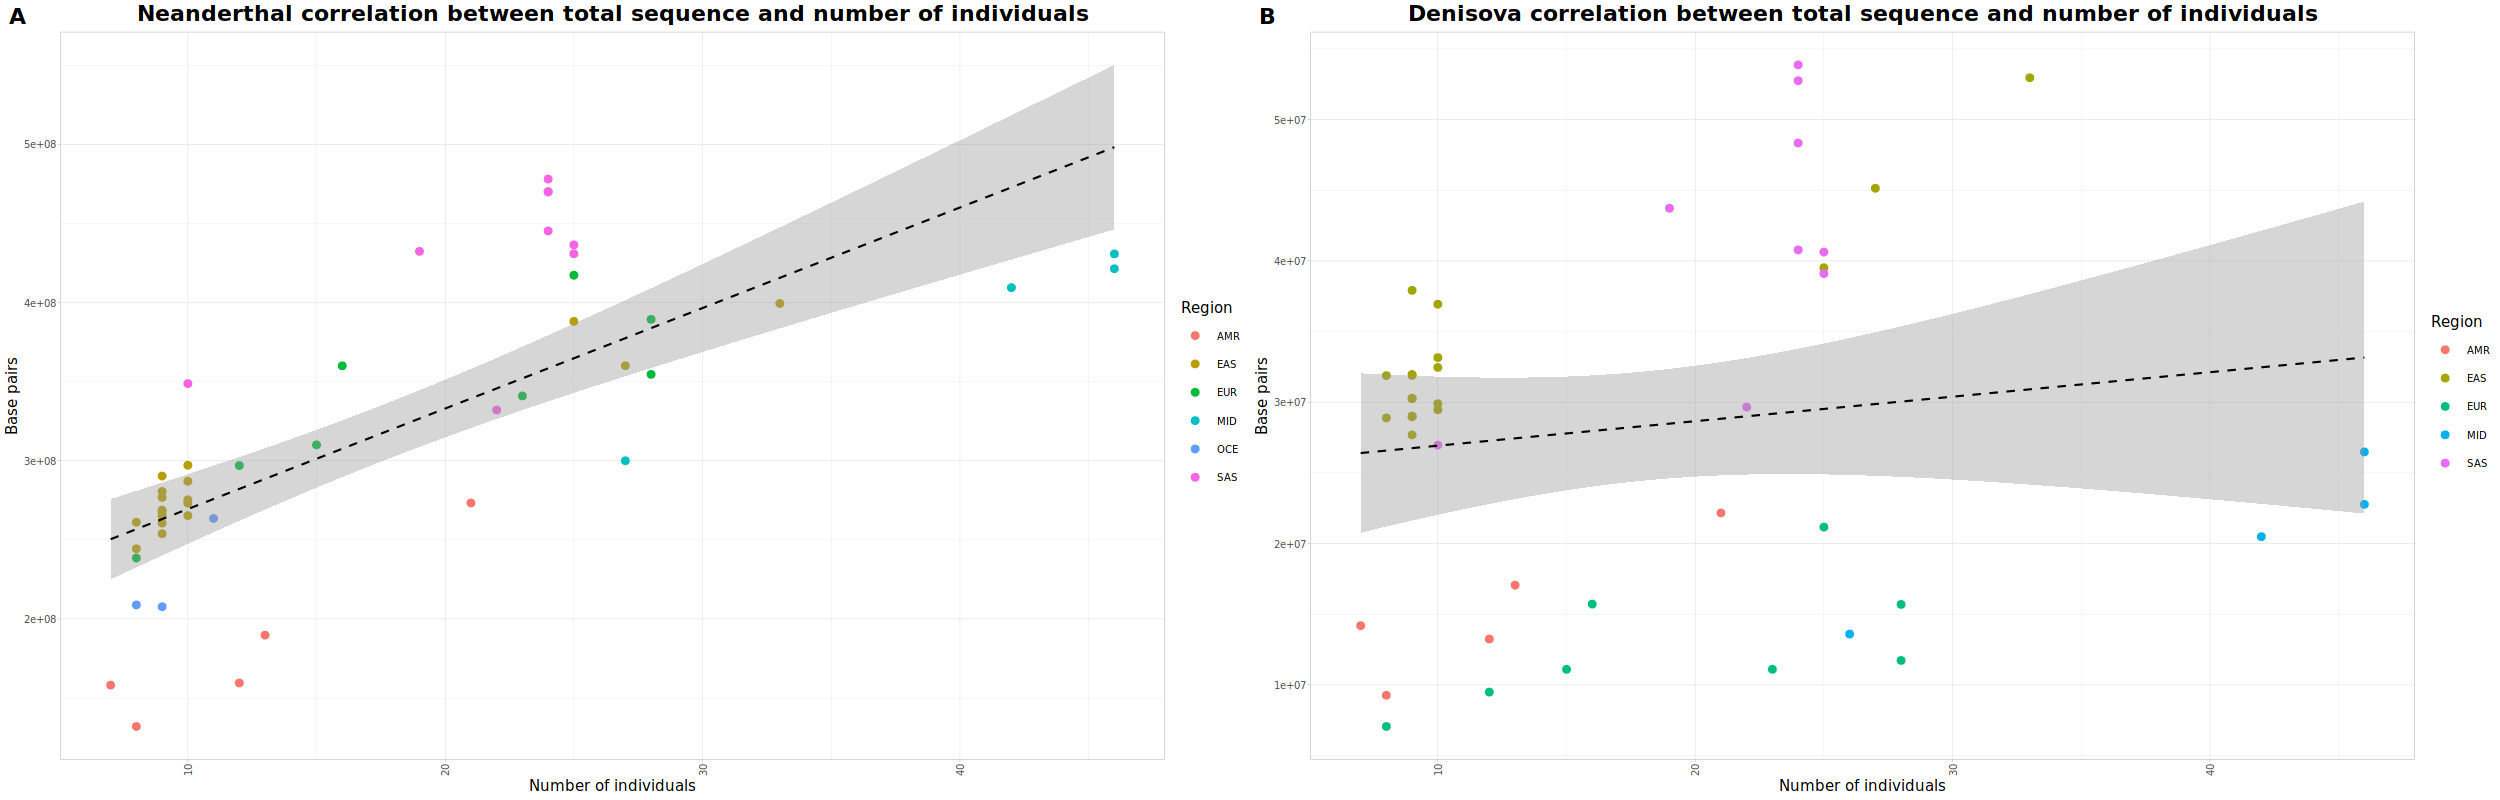

In [3]:
%%R -w 2500 -h 800

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/art_gen_summary.txt", header=T)
plot_grid(
df %>%
    ggplot() +
    geom_point(aes(x = ind_neanderthal, y = total_seq_len_neanderthal,color=reg),size=3.5) +
    theme_light() +
    geom_smooth(method = "lm" ,aes(x = ind_neanderthal, y =total_seq_len_neanderthal), linetype = "dashed", color='black') +
    labs(title='Neanderthal correlation between total sequence and number of individuals',x='Number of individuals',y='Total sequence (base pairs)',color='Region') +
    theme(plot.title = element_text(hjust=0.5,face='bold',size=22),
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=10),
          axis.text.y = element_text(size=10),
          axis.title = element_text(size=15),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=15), 
          legend.text = element_text(size=10)),
df %>%
    filter(reg != 'OCE') %>%
    ggplot() +
    geom_point(aes(x = ind_denisova, y = total_seq_len_denisova,color=reg),size=3.5) +
    theme_light() +
    geom_smooth(method = "lm" ,aes(x = ind_denisova, y =total_seq_len_denisova), linetype = "dashed", color='black') +
    labs(title='Denisova correlation between total sequence and number of individuals',x='Number of individuals',y='Total sequence (base pairs)',color='Region') +
    theme(plot.title = element_text(hjust=0.5,face='bold',size=22),
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=10),
          axis.text.y = element_text(size=10),
          axis.title = element_text(size=15),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=15), 
          legend.text = element_text(size=10)),
labels="AUTO",
label_size=22
)

`geom_smooth()` using formula = 'y ~ x'


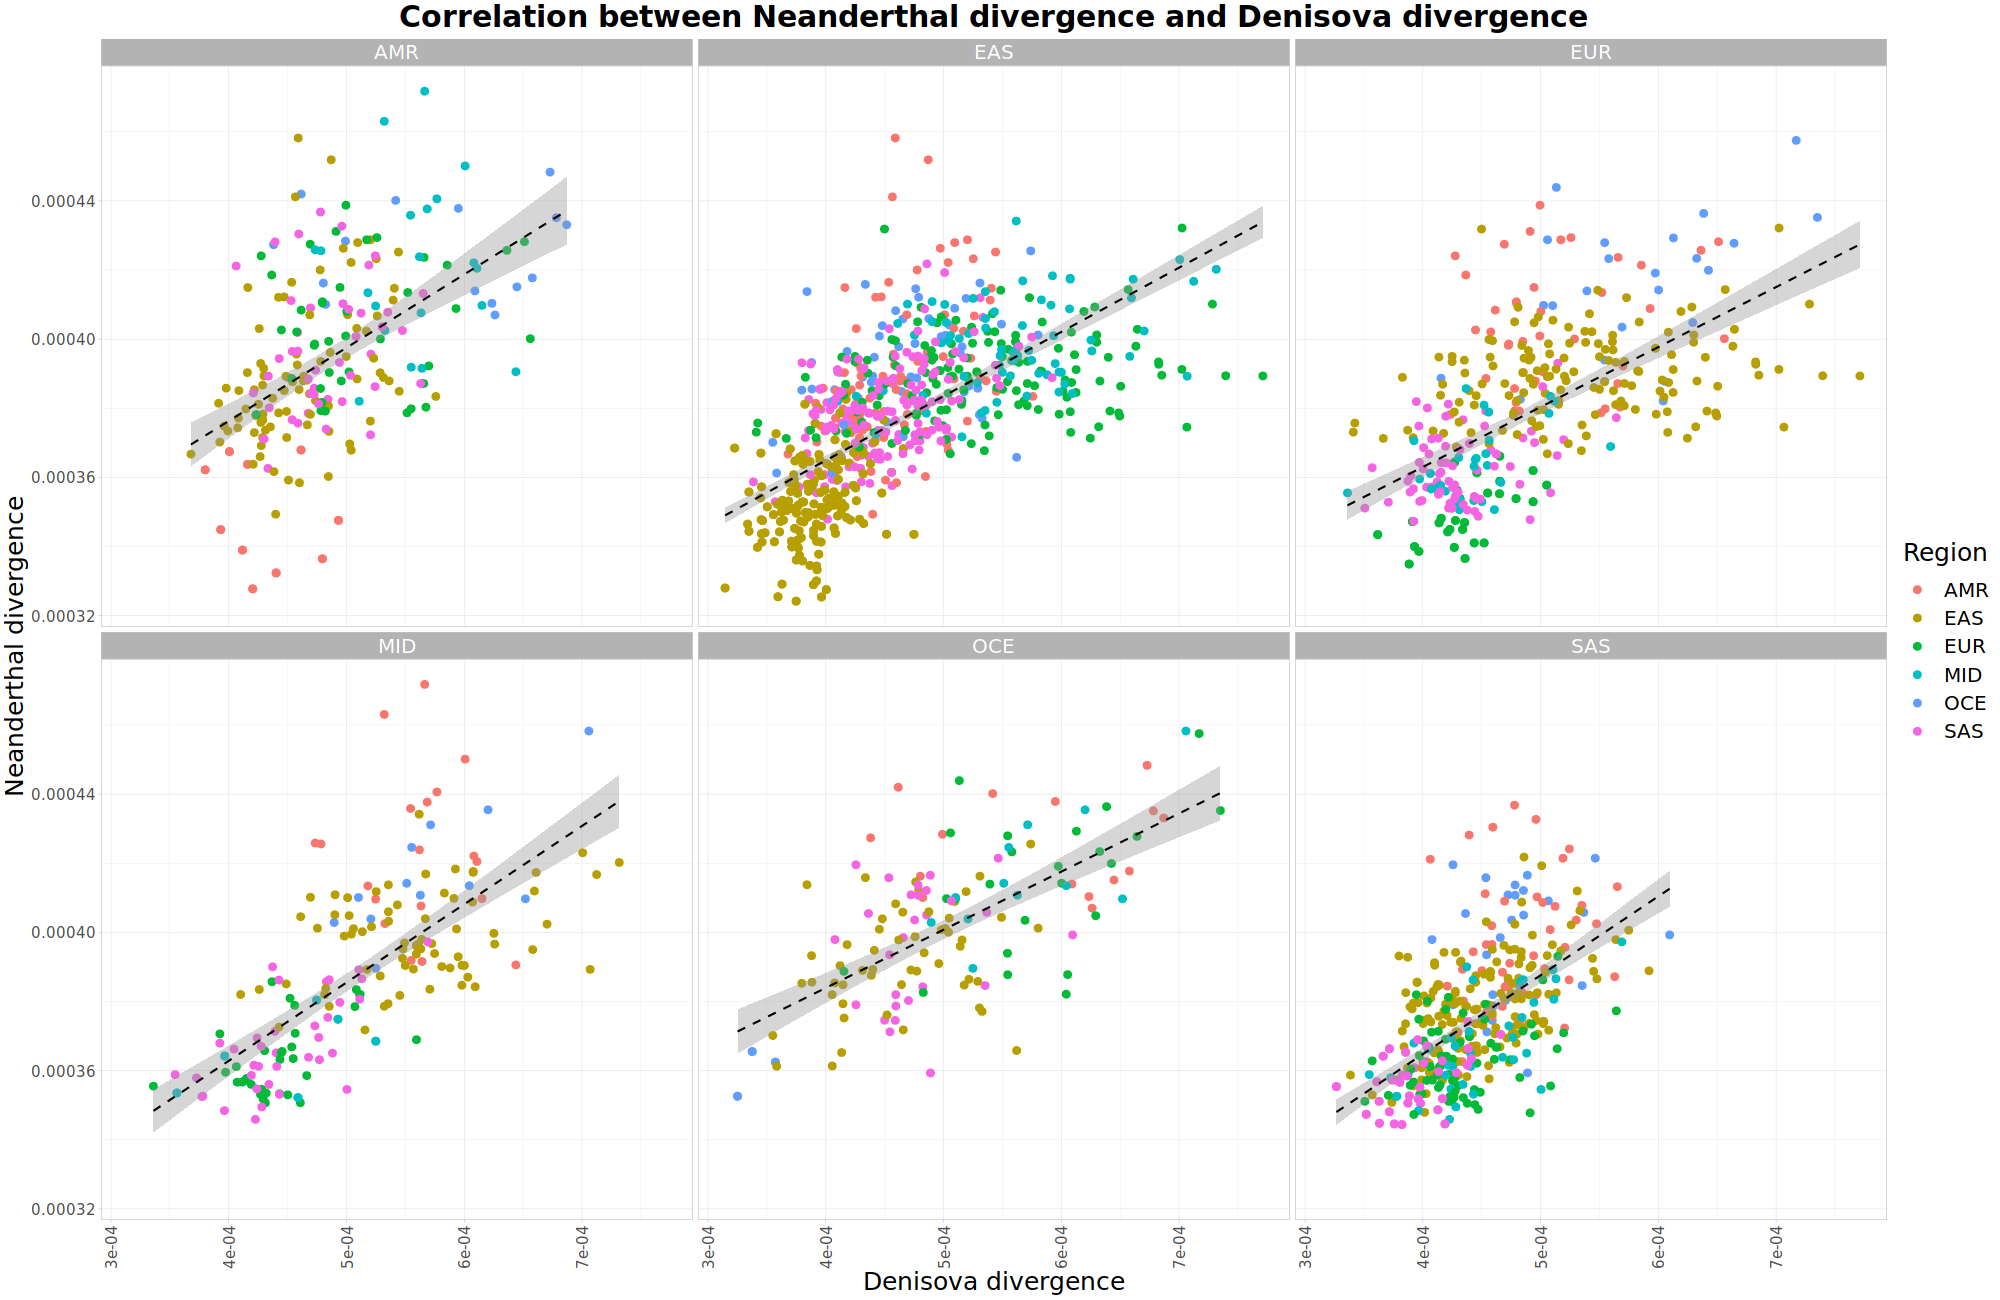

In [18]:
%%R -w 2000 -h 1300

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
    filter(nean_ratio1 < 1.00) 

df %>%
    ggplot() +
    geom_point(aes(x = div_denisova, y = div_neanderthal, color = reg2),size=3.5) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15),
          axis.text.y = element_text(size=15),
          axis.title = element_text(size=25),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=25), 
          legend.text = element_text(size=20),
          strip.text = element_text(size=20),
          plot.title = element_text(face='bold',size=30,hjust=0.5,vjust=1)) +
    labs(x='Denisova divergence',y='Neanderthal divergence ',color='Region',title='Correlation between Neanderthal divergence and Denisova divergence') +
    geom_smooth(method = "lm" ,aes(x = div_denisova, y =div_neanderthal), linetype = "dashed", color='black') +
    #geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_neanderthal, group = paste(reg1, reg2))) +
    facet_wrap(reg1~.,ncol=3)

Failed to query server: Transport endpoint is not connected


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
`geom_smooth()` using formula = 'y ~ x'


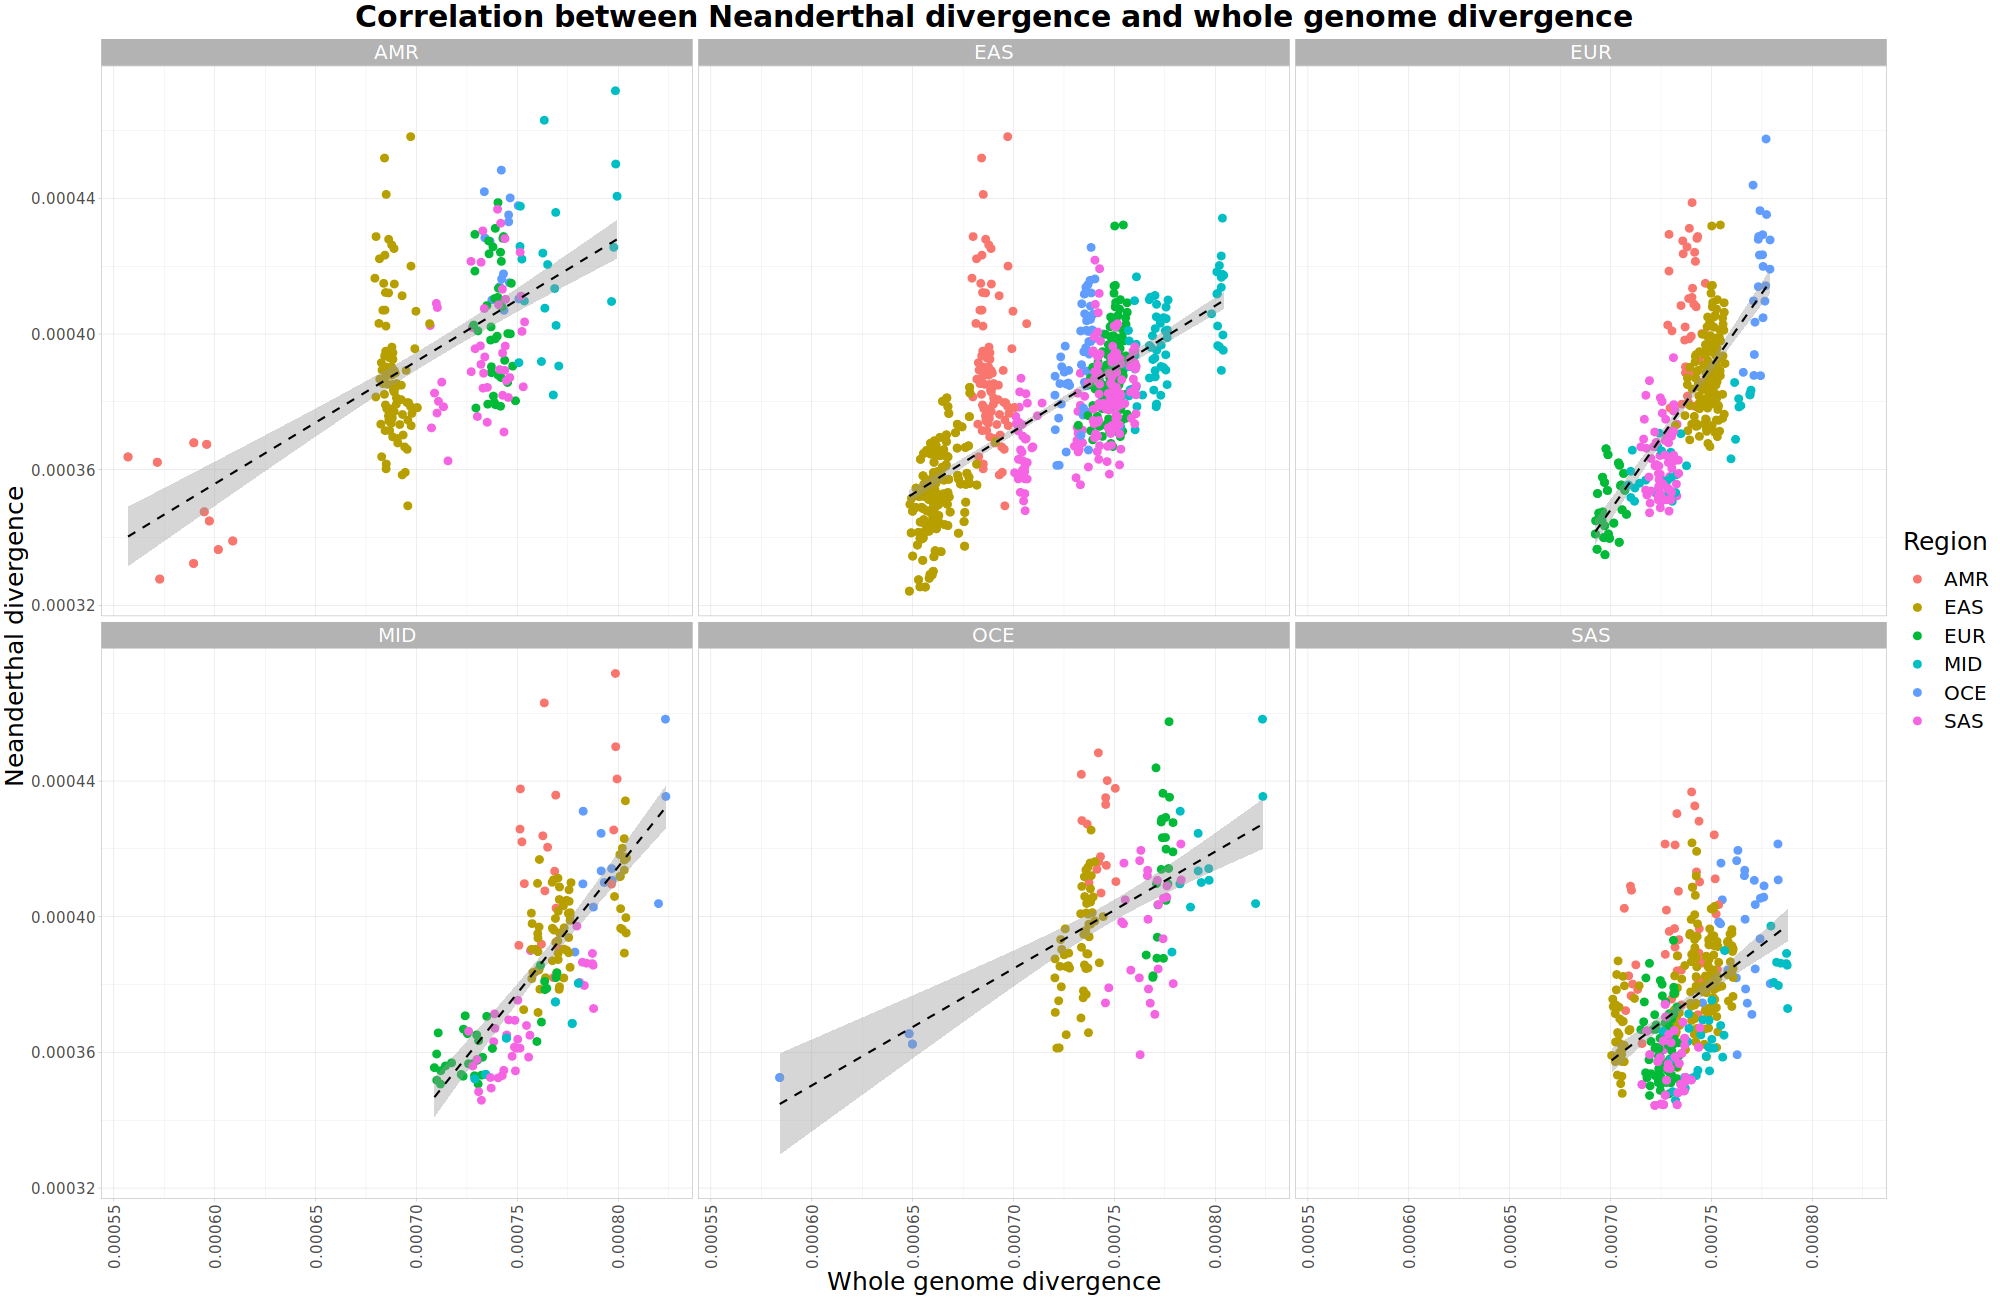

In [17]:
%%R -w 2000 -h 1300

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
    filter(nean_ratio1 < 1.00) 

df %>%
    ggplot() +
    geom_point(aes(x = div_whole_genome, y = div_neanderthal, color = reg2),size=3.5) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15),
          axis.text.y = element_text(size=15),
          axis.title = element_text(size=25),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=25), 
          legend.text = element_text(size=20),
          strip.text = element_text(size=20),
          plot.title = element_text(face='bold',size=30,hjust=0.5,vjust=1)) +
    labs(x='Whole genome divergence',y='Neanderthal divergence ',color='Region',title='Correlation between Neanderthal divergence and whole genome divergence') +
    geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_neanderthal), linetype = "dashed", color='black') +
    #geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_neanderthal, group = paste(reg1, reg2))) +
    facet_wrap(reg1~.,ncol=3)

`geom_smooth()` using formula = 'y ~ x'


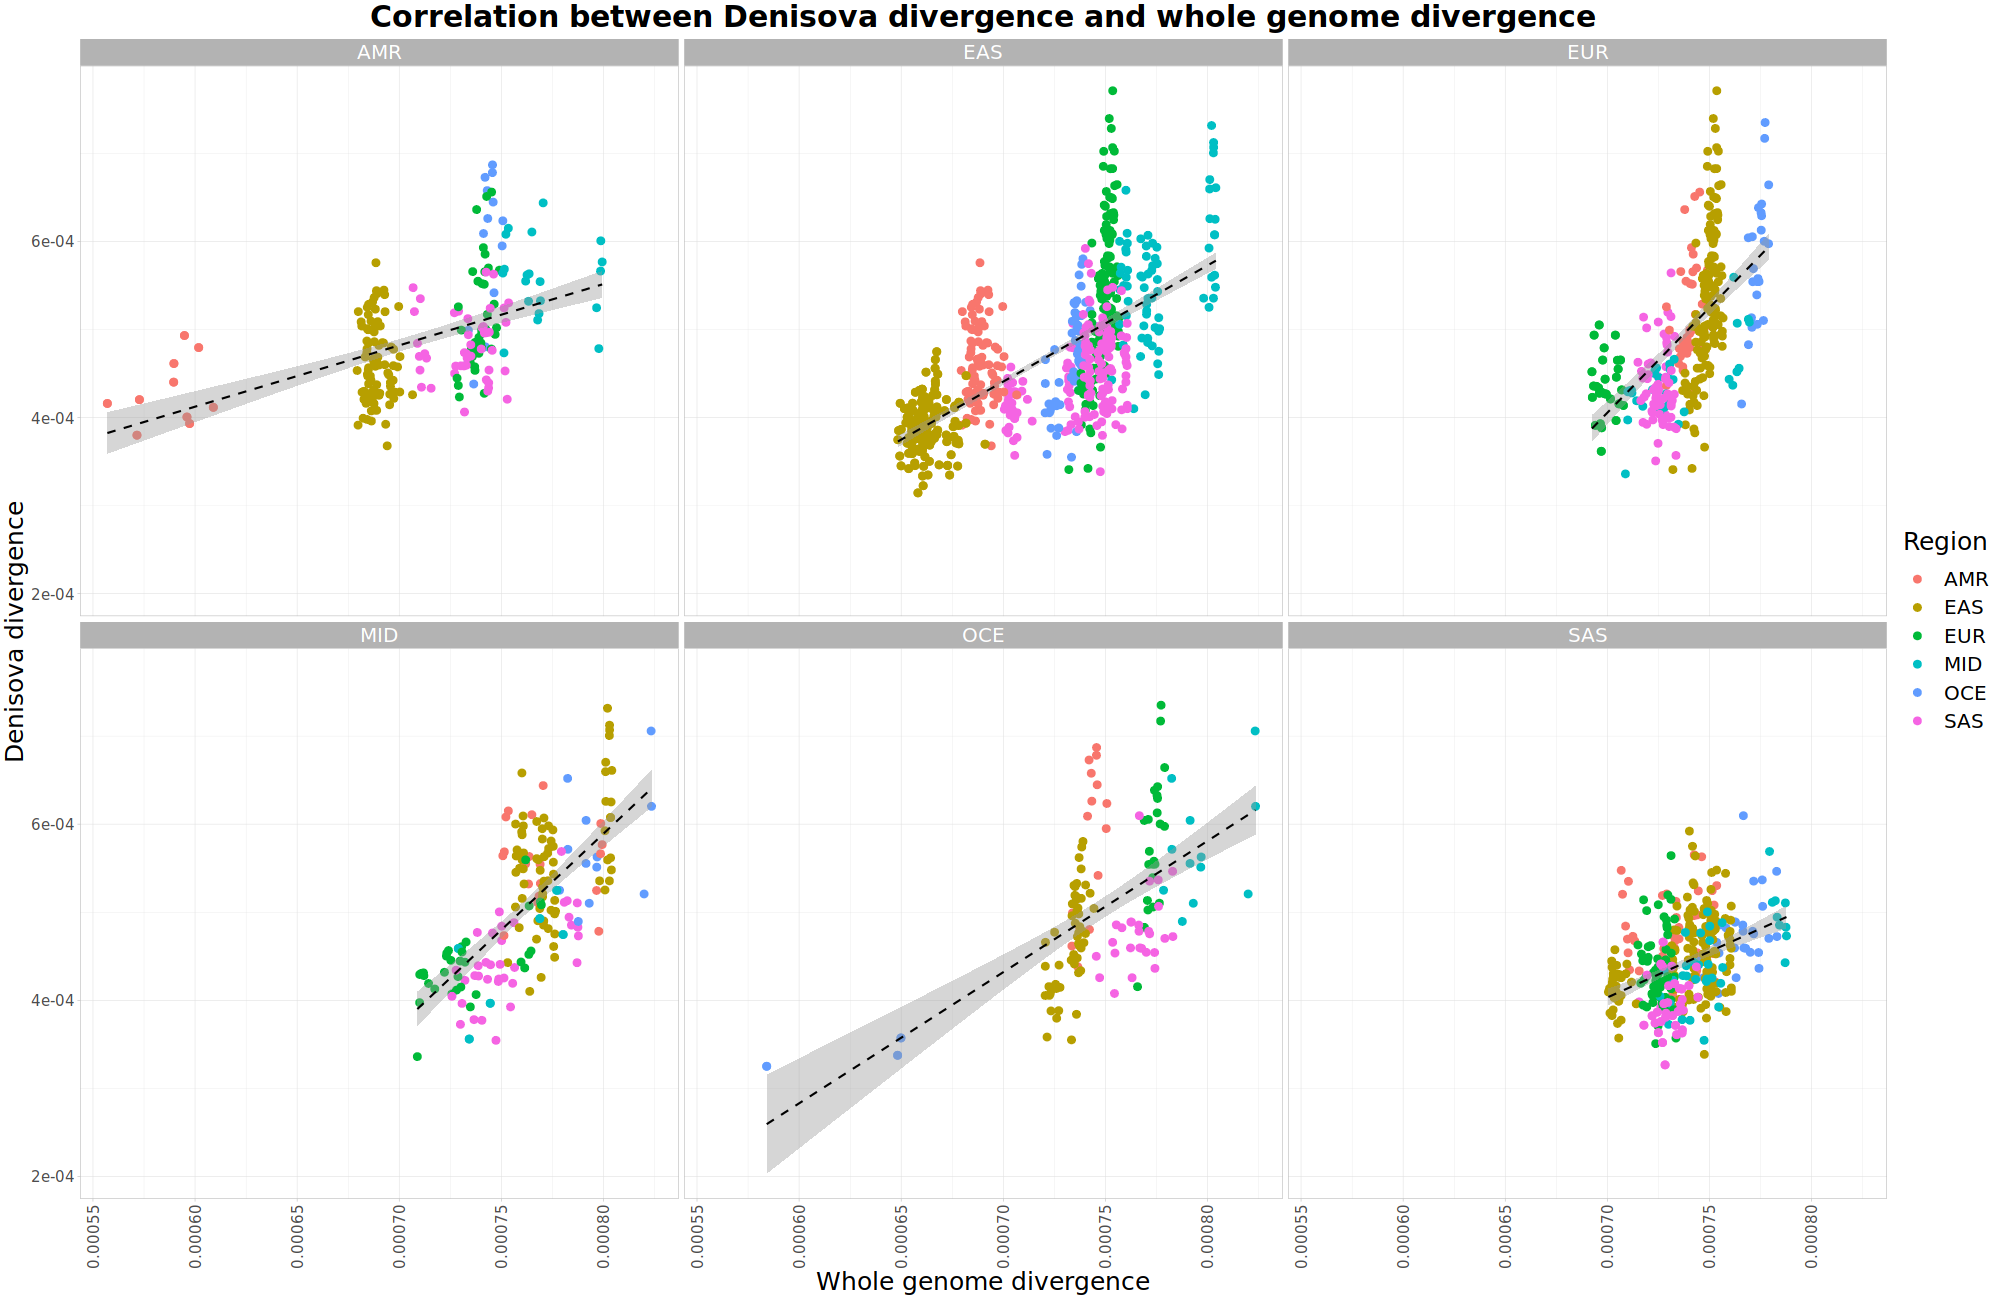

In [52]:
%%R -w 2000 -h 1300

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
    filter(deni_ratio1 < 1.00 & div_denisova>6e-05) 

df %>%
    ggplot() +
    geom_point(aes(x = div_whole_genome, y = div_denisova, color = reg2),size=3.5) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15),
          axis.text.y = element_text(size=15),
          axis.title = element_text(size=25),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=25), 
          legend.text = element_text(size=20),
          strip.text = element_text(size=20),
          plot.title = element_text(face='bold',size=30,hjust=0.5,vjust=1)) +
    labs(x='Whole genome divergence',y='Denisova divergence',color='Region',title='Correlation between Denisova divergence and whole genome divergence') +
    geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_denisova), linetype = "dashed", color='black') +
   # geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_denisova, group = paste(reg1, reg2)), color='black') +
    facet_wrap(reg1~.,ncol=3)

`geom_smooth()` using formula = 'y ~ x'


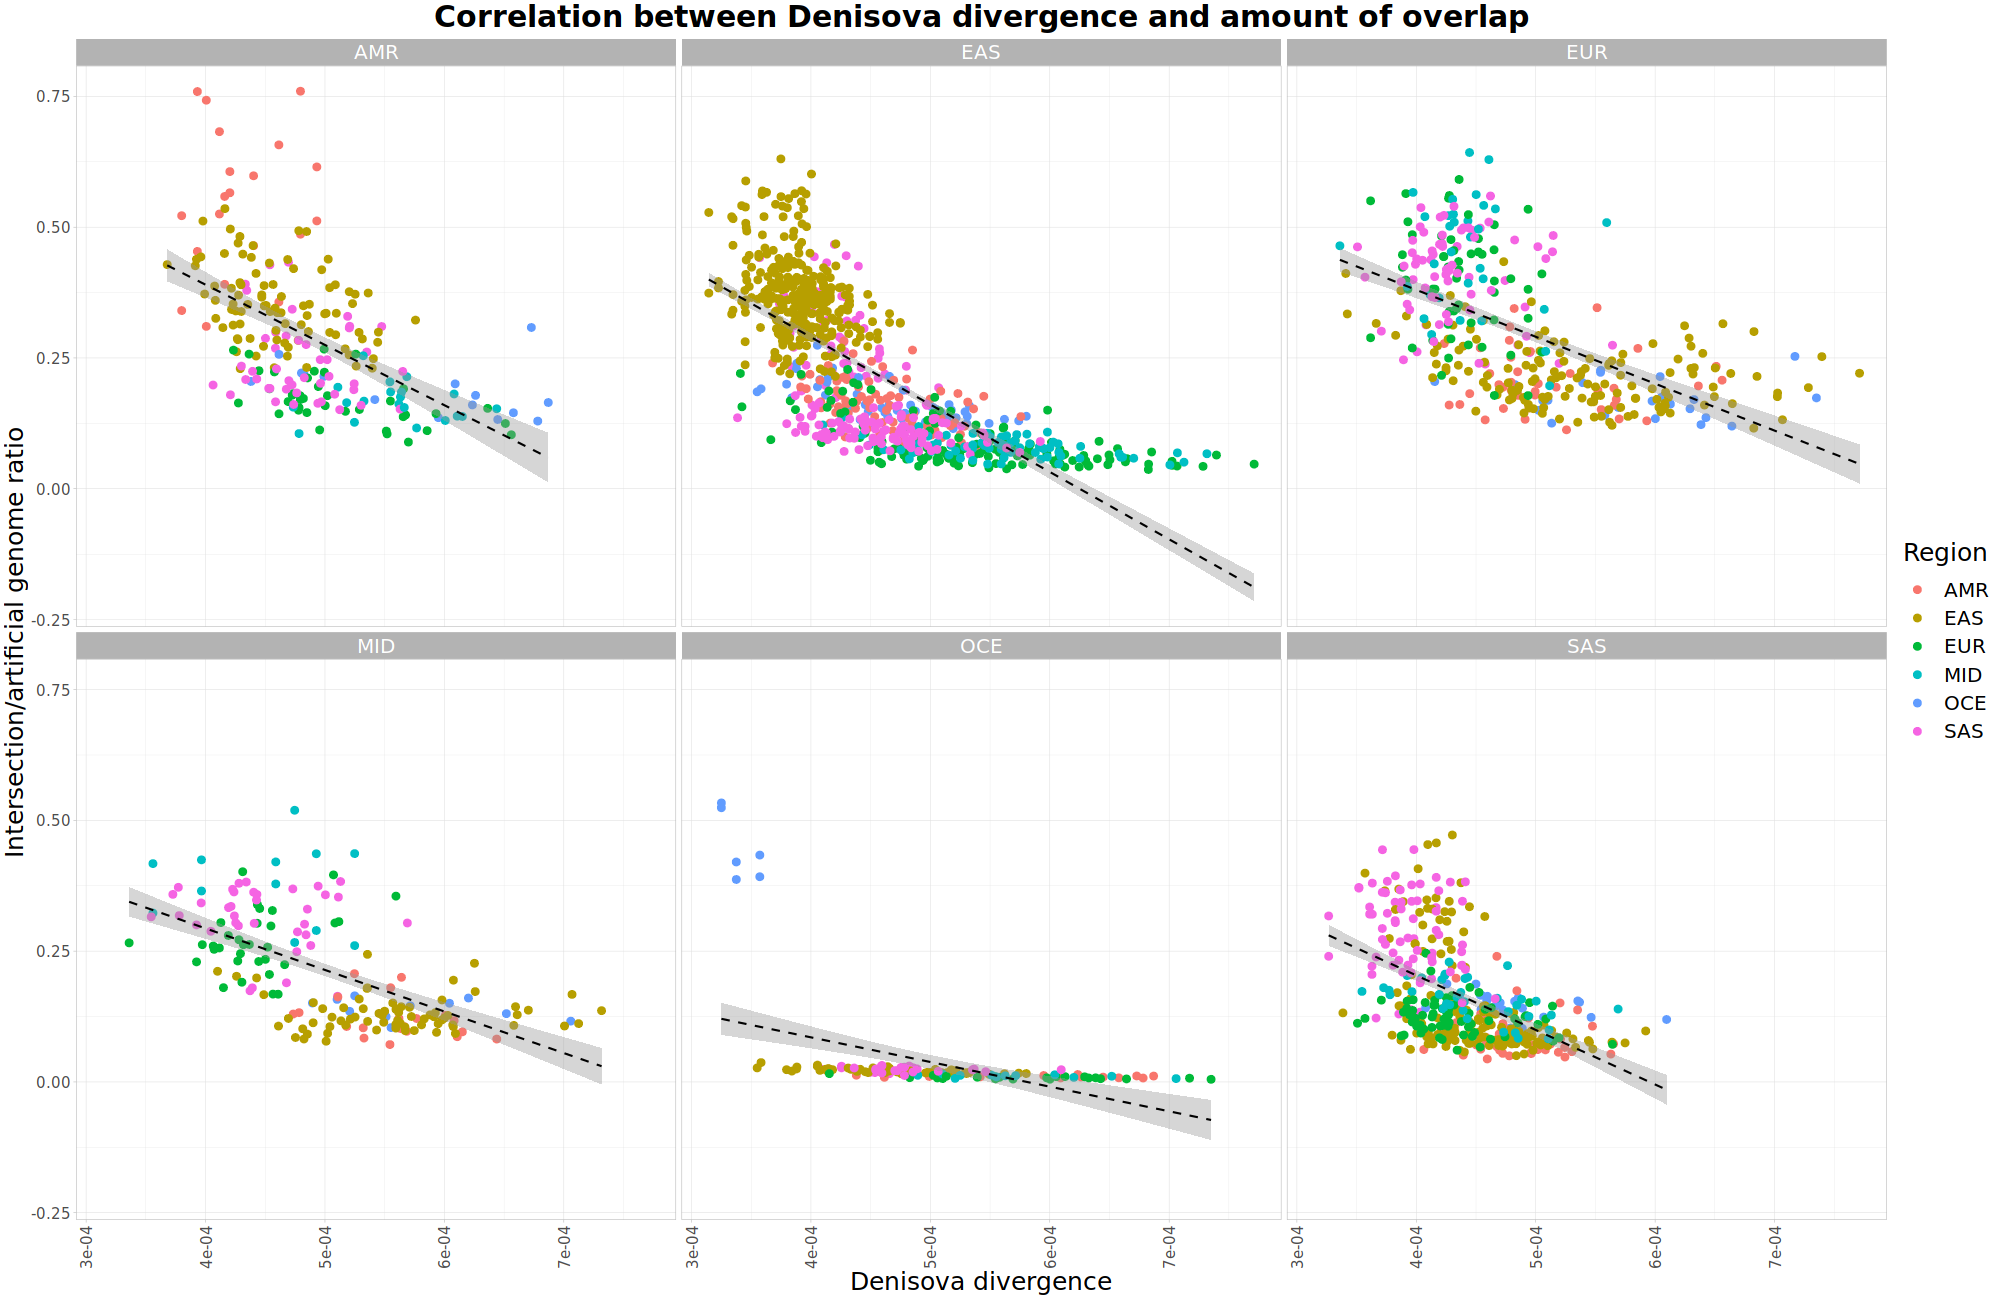

In [53]:
%%R -w 2000 -h 1300

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
    filter(deni_ratio1 < 1.00 & div_denisova>6e-05) 

df %>%
    ggplot() +
    geom_point(aes(x = div_denisova, y = deni_ratio1, color = reg2),size=3.5) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15),
          axis.text.y = element_text(size=15),
          axis.title = element_text(size=25),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=25), 
          legend.text = element_text(size=20),
          strip.text = element_text(size=20),
          plot.title = element_text(face='bold',size=30,hjust=0.5,vjust=1)) +
    labs(y='Intersection/artificial genome ratio',x='Denisova divergence',color='Region',title='Correlation between Denisova divergence and amount of overlap') +
    geom_smooth(method = "lm" ,aes(x = div_denisova, y =deni_ratio1), linetype = "dashed", color='black') +
 #   geom_smooth(method = "lm" ,aes(x = div_denisova, y =deni_ratio1, group = paste(reg1, reg2)), color='black') +
    facet_wrap(reg1~.,ncol=3)

`geom_smooth()` using formula = 'y ~ x'


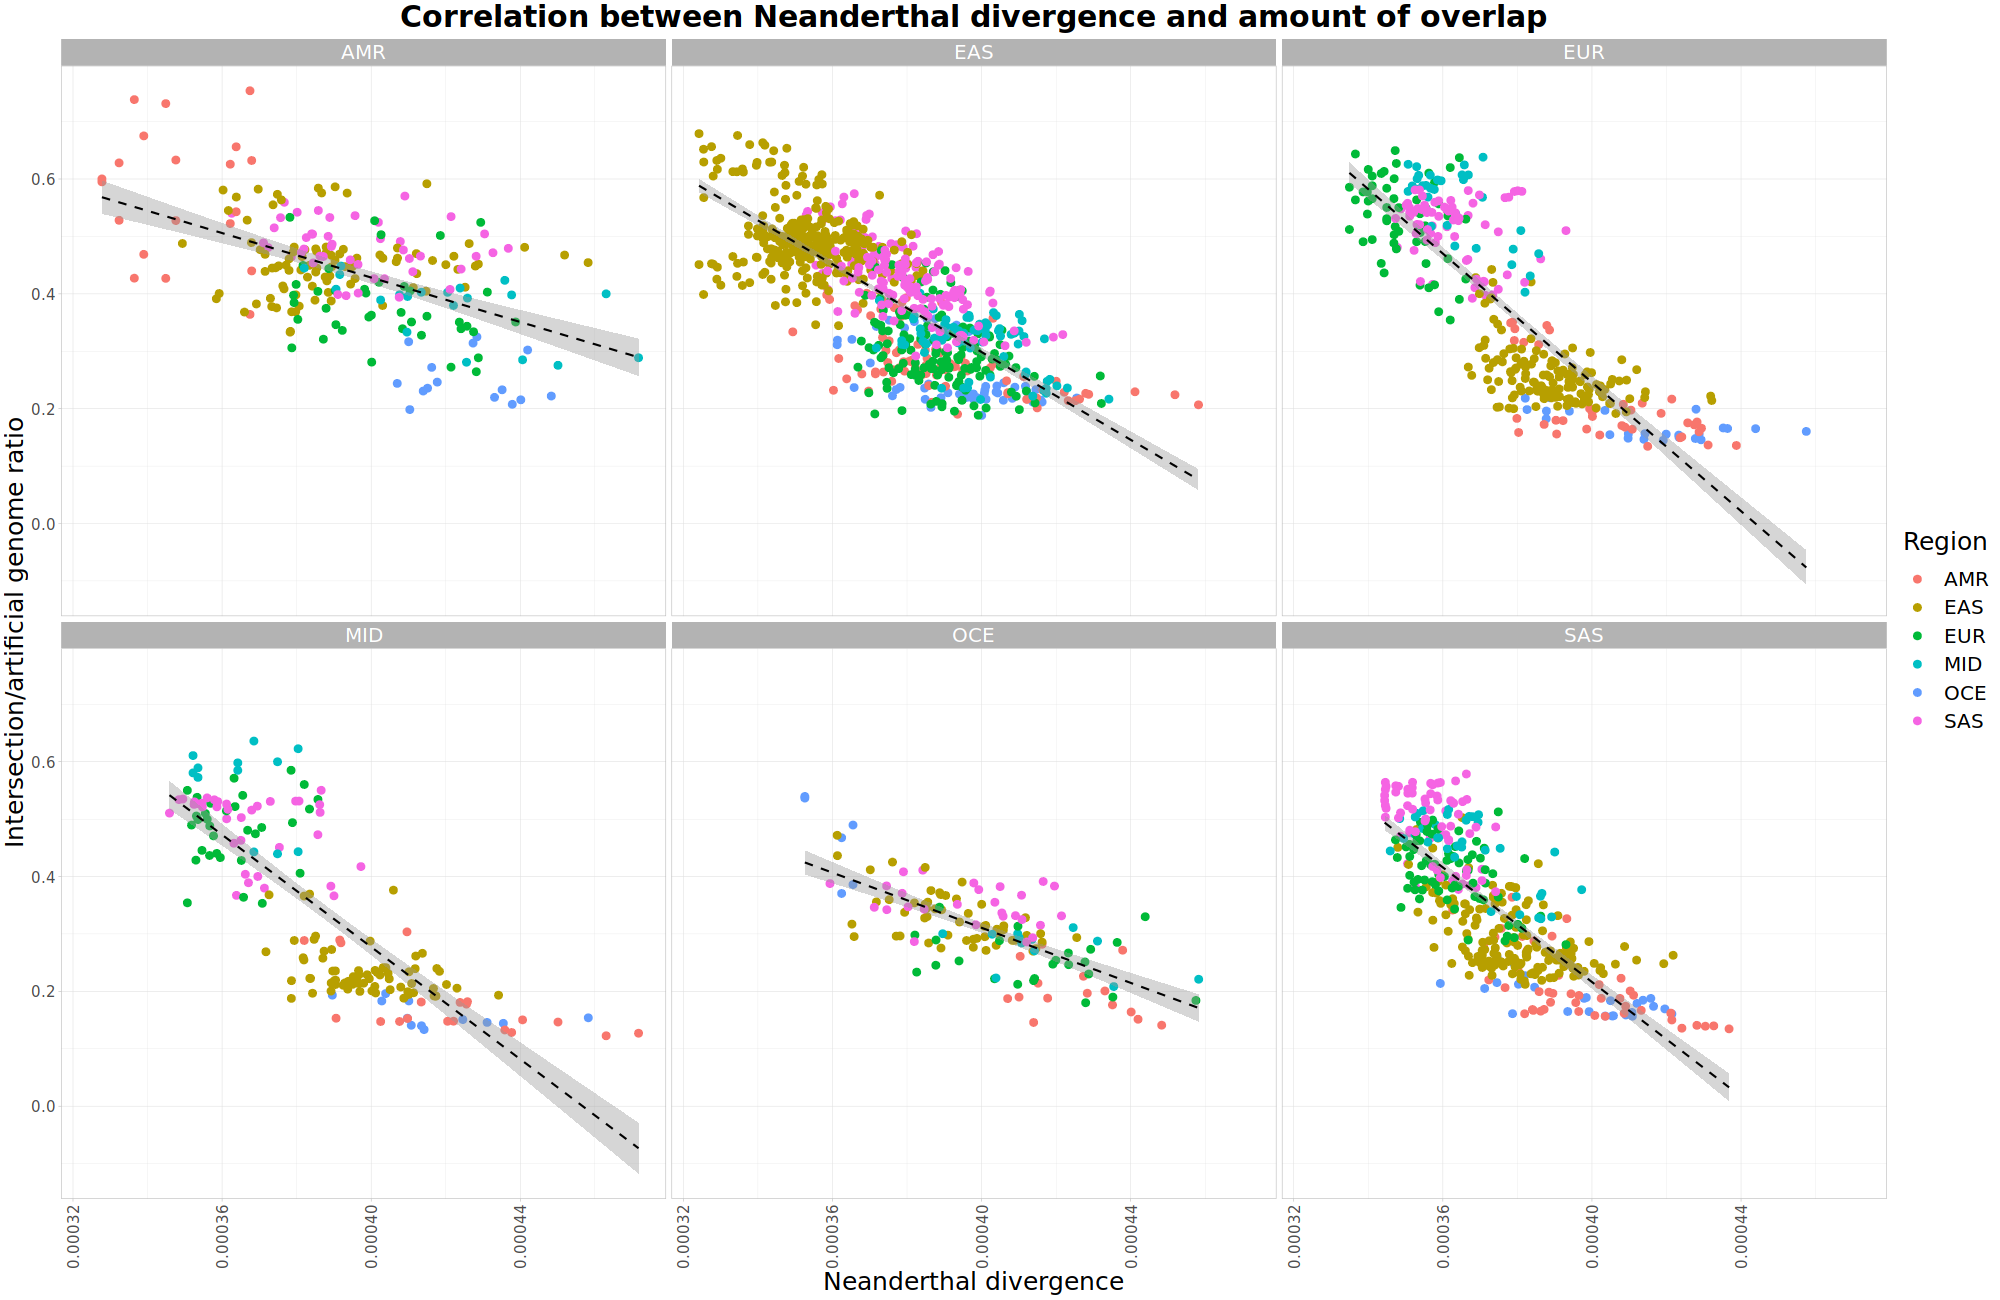

In [54]:
%%R -w 2000 -h 1300

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
    filter(nean_ratio1 < 1.00) 

df %>%
    ggplot() +
    geom_point(aes(x = div_neanderthal, y = nean_ratio1, color = reg2),size=3.5) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15),
          axis.text.y = element_text(size=15),
          axis.title = element_text(size=25),
          legend.key.size = unit(1, 'cm'), 
          legend.key.height = unit(1, 'cm'), 
          legend.key.width = unit(1, 'cm'), 
          legend.title = element_text(size=25), 
          legend.text = element_text(size=20),
          strip.text = element_text(size=20),
          plot.title = element_text(face='bold',size=30,hjust=0.5,vjust=1)) +
    labs(y='Intersection/artificial genome ratio',x='Neanderthal divergence',color='Region',title='Correlation between Neanderthal divergence and amount of overlap') +
    geom_smooth(method = "lm" ,aes(x = div_neanderthal, y =nean_ratio1), linetype = "dashed", color='black') +
   # geom_smooth(method = "lm" ,aes(x = div_neanderthal, y =nean_ratio1, group = paste(reg1, reg2)), color='black') +
    facet_wrap(reg1~.,ncol=3)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


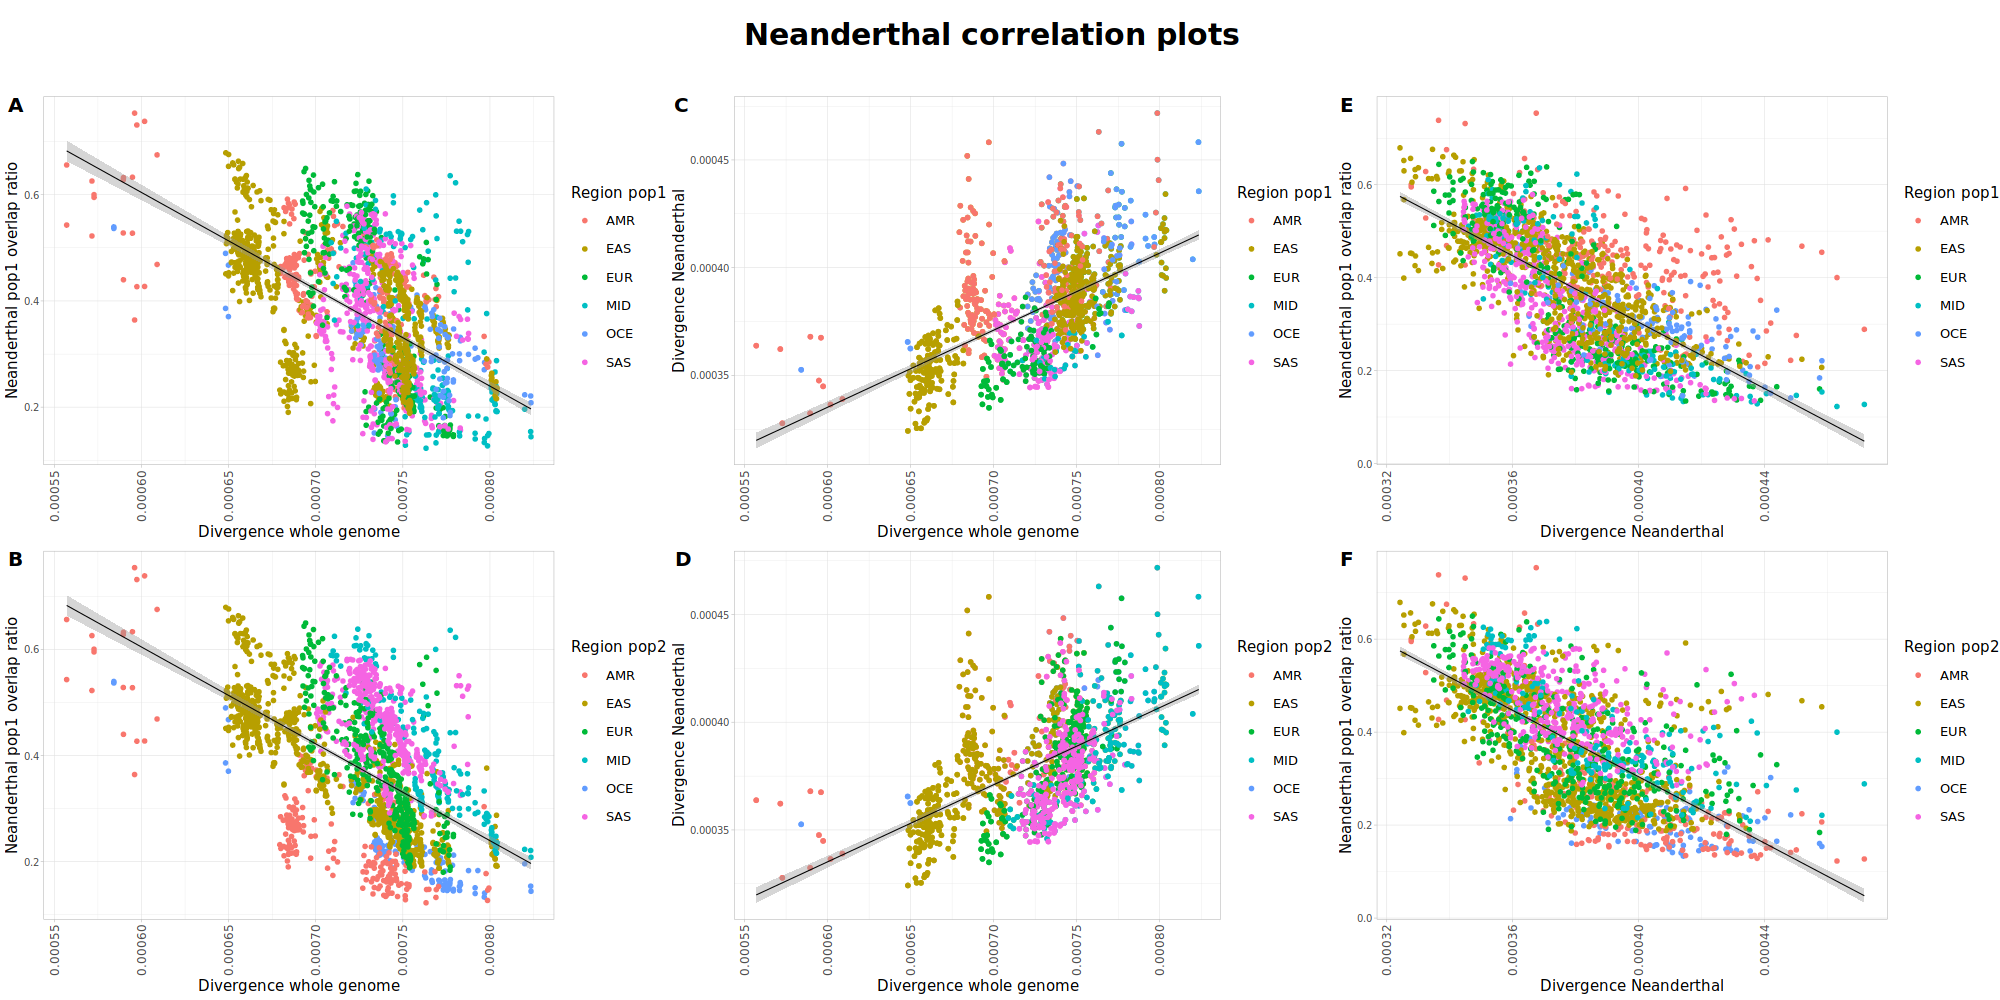

In [104]:
%%R  -w 2000 -h 1000

library(tidyverse)
library(cowplot)

regregrg <- "OCE"

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
            filter(nean_ratio1<1.00) #%>%
            #filter(reg1 == regregrg | reg2 == regregrg)

p1 <- df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = nean_ratio1, color = reg1),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm", aes(x = div_whole_genome, y =nean_ratio1),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Neanderthal pop1 overlap ratio', color='Region pop1')
p2 <- df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = div_neanderthal, color = reg1),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm", aes(x = div_whole_genome, y =div_neanderthal),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Divergence Neanderthal', color='Region pop1')
p3 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_neanderthal,y = nean_ratio1, color = reg1),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm", aes(x =div_neanderthal,y = nean_ratio1),color='black',size=0.5) +
        labs(x='Divergence Neanderthal',y='Neanderthal pop1 overlap ratio', color='Region pop1') 
p4 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = nean_ratio1, color = reg2),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =nean_ratio1),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Neanderthal pop1 overlap ratio', color='Region pop2')
p5 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = div_neanderthal, color = reg2),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_neanderthal),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Divergence Neanderthal', color='Region pop2')
p6 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_neanderthal, y = nean_ratio1, color = reg2),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm" ,aes(x =div_neanderthal,y = nean_ratio1),color='black',size=0.5) +
        labs(x='Divergence Neanderthal',y='Neanderthal pop1 overlap ratio', color='Region pop2')

plot_row <- plot_grid(p1, p2,p3,p4,p5,p6,labels=c("A","C","E","B","D","F"),label_size=20)

title <- ggdraw() + 
  draw_label(
    "Neanderthal correlation plots",
    fontface = 'bold',
    x = 0,
    hjust = -1.5,
    vjust=0,
    size=30
  ) 
plot_grid(
  title, plot_row,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


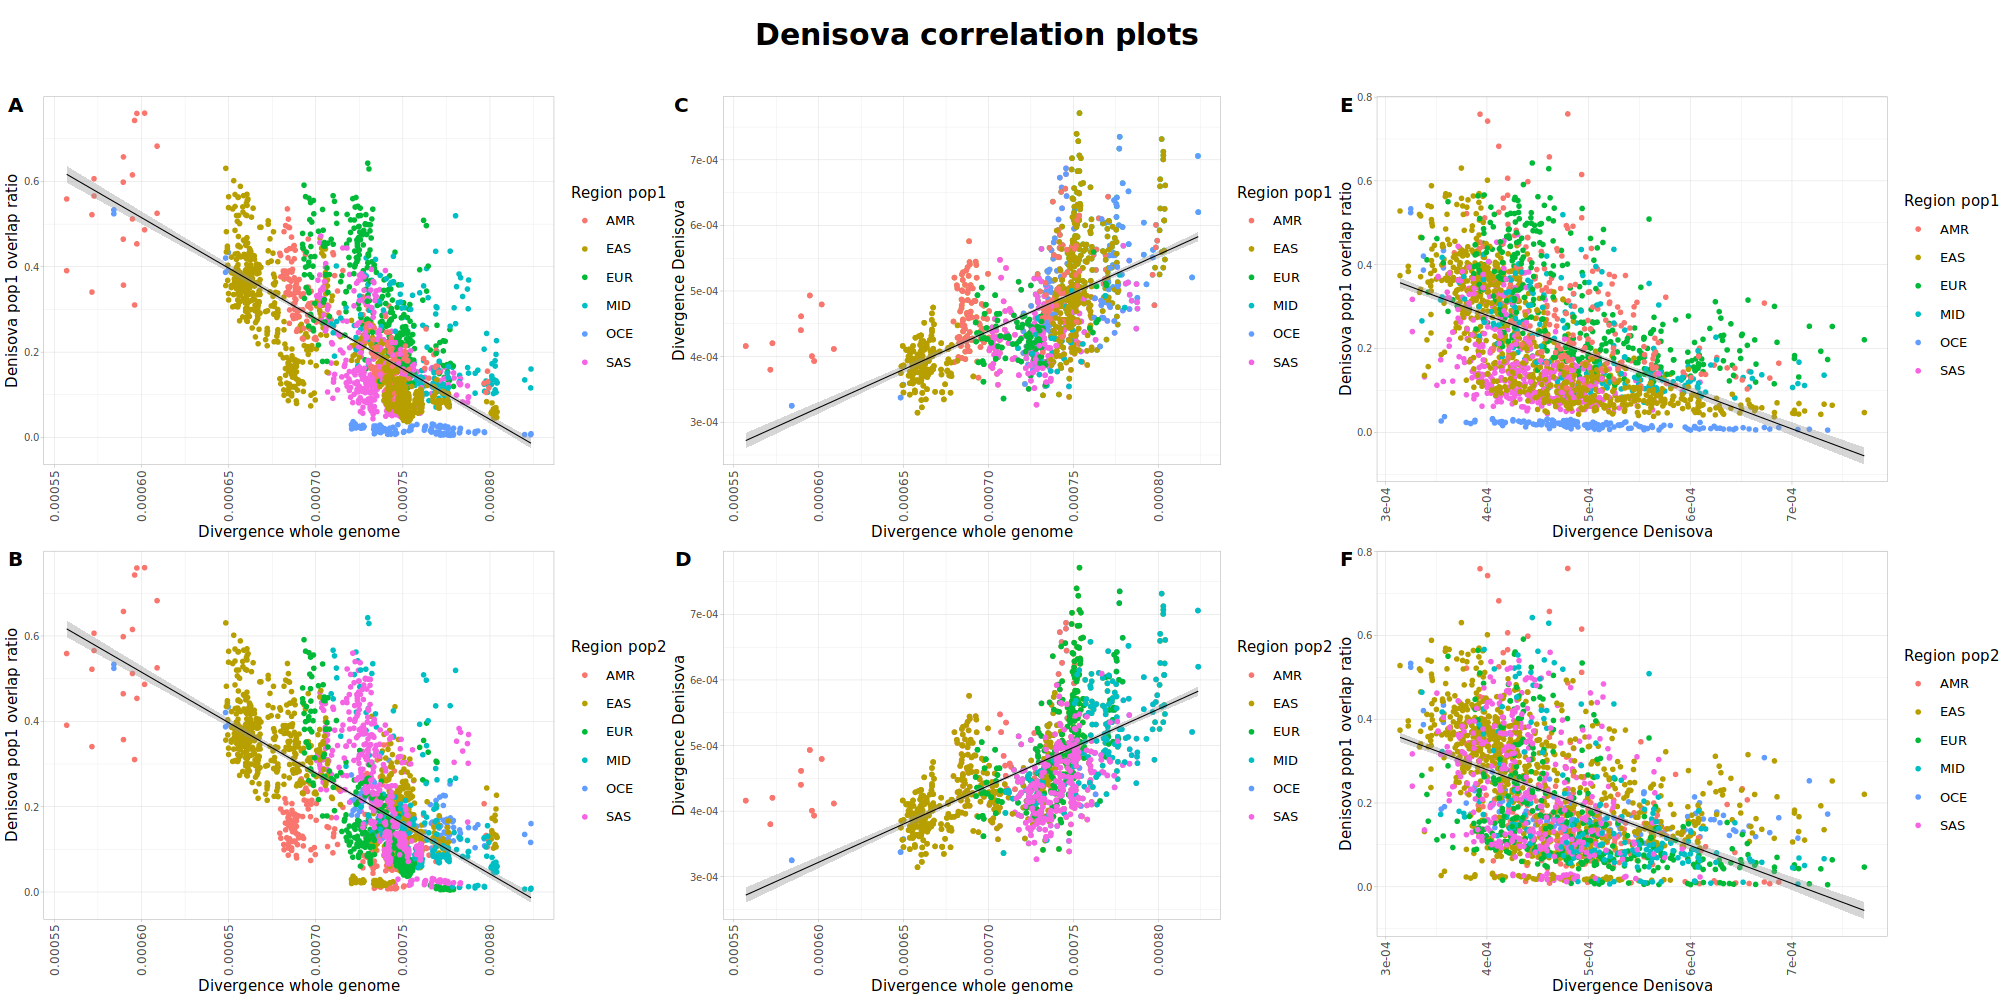

In [106]:
%%R  -w 2000 -h 1000

library(tidyverse)
library(cowplot)

regregrg <- "OCE"

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
            filter(deni_ratio1<1 & div_denisova>6e-05)
            #filter(reg1 == regregrg | reg2 == regregrg)

p1 <- df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = deni_ratio1, color = reg1),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm", aes(x = div_whole_genome, y =deni_ratio1),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Denisova pop1 overlap ratio', color='Region pop1')
p2 <- df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = div_denisova, color = reg1),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm", aes(x = div_whole_genome, y =div_denisova),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Divergence Denisova', color='Region pop1')
p3 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_denisova,y = deni_ratio1, color = reg1),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm", aes(x =div_denisova,y = deni_ratio1),color='black',size=0.5) +
        labs(x='Divergence Denisova',y='Denisova pop1 overlap ratio', color='Region pop1') 
p4 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = deni_ratio1, color = reg2),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =deni_ratio1),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Denisova pop1 overlap ratio', color='Region pop2')
p5 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_whole_genome, y = div_denisova, color = reg2),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_denisova),color='black',size=0.5) +
        labs(x='Divergence whole genome',y='Divergence Denisova', color='Region pop2')
p6 <-    df %>%
        ggplot() +
        geom_point(aes(x = div_denisova, y = deni_ratio1, color = reg2),size=2) +
        theme_light() +
        theme(legend.key.size = unit(1, 'cm'), 
              legend.key.height = unit(1, 'cm'), 
              legend.key.width = unit(1, 'cm'), 
              legend.title = element_text(size=15), 
              legend.text = element_text(size=13), 
              axis.text=element_text(size=10),
              axis.title=element_text(size=15),
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=12)) +
        geom_smooth(method = "lm" ,aes(x =div_denisova,y = deni_ratio1),color='black',size=0.5) +
        labs(x='Divergence Denisova',y='Denisova pop1 overlap ratio', color='Region pop2')

plot_row <- plot_grid(p1, p2,p3,p4,p5,p6,labels=c("A","C","E","B","D","F"),label_size=20)

title <- ggdraw() + 
  draw_label(
    "Denisova correlation plots",
    fontface = 'bold',
    x = 0,
    hjust = -1.7,
    vjust=0,
    size=30
  ) 
plot_grid(
  title, plot_row,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


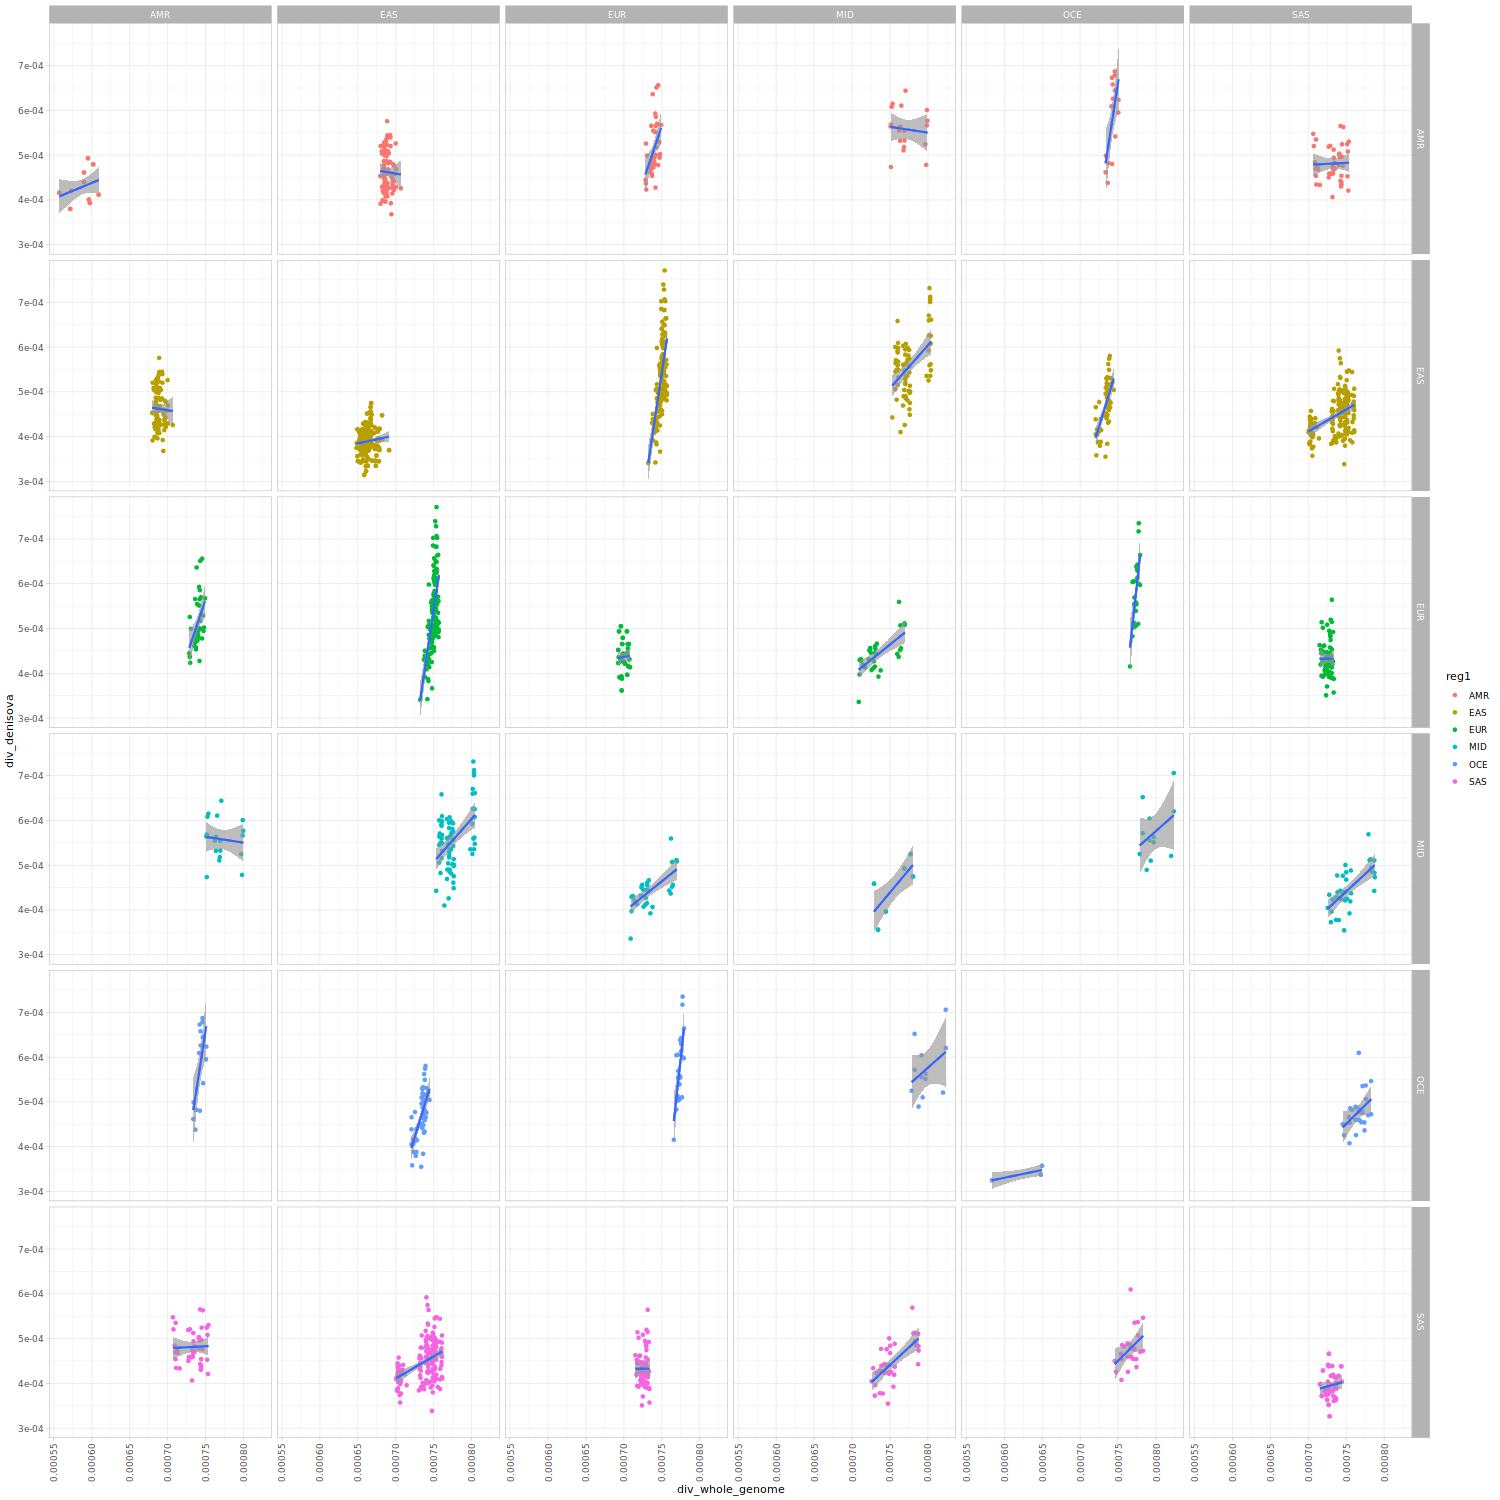

In [93]:
%%R -w 1500 -h 1500

library(tidyverse)
library(cowplot)

df <- read.table("../script_results/tables/All_summary_table.txt", header=T) %>%
    filter(deni_ratio1 < 1.00) 

df %>%
    ggplot() +
    geom_point(aes(x = div_whole_genome, y = div_denisova, color = reg1)) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_denisova), linetype = "dashed") +
    geom_smooth(method = "lm" ,aes(x = div_whole_genome, y =div_denisova, group = paste(reg1, reg2))) +
    facet_grid(reg1~reg2)

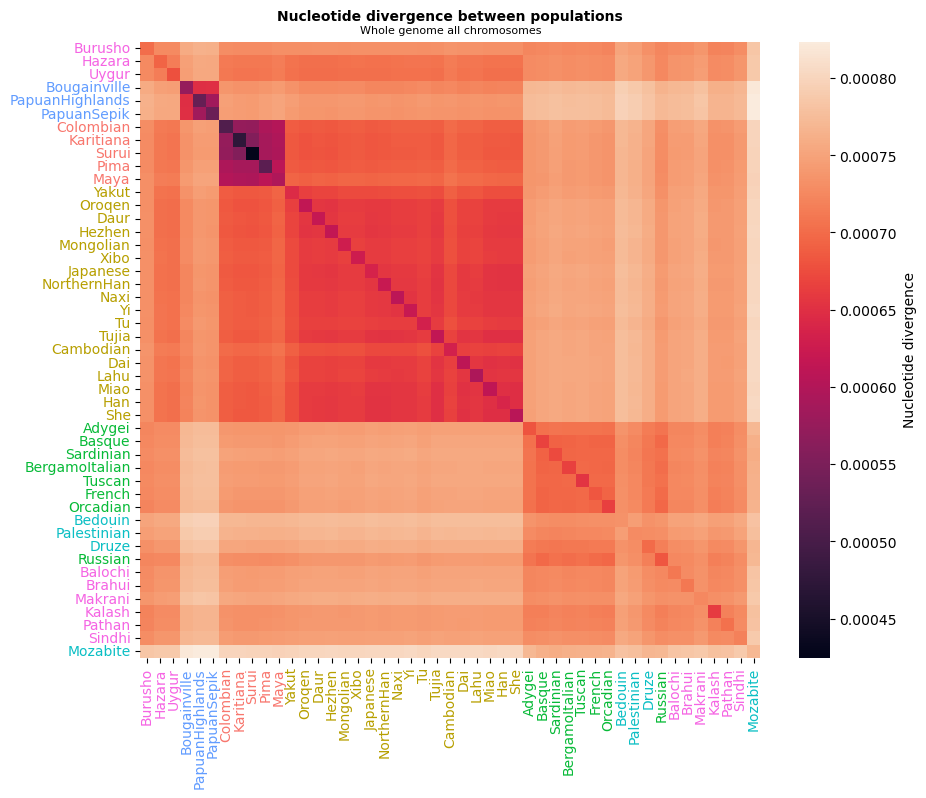

In [7]:
df = div_whole_genome
#df.loc[df["pop1"] == df['pop2'], "mpd"] = 0
df['div_whole_genome'] = df['mpd_whole_genome'] / 2252286208

result = df.pivot(index='pop1',columns='pop2',values='div_whole_genome')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True,cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Whole genome all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.savefig('../script_results/plots/div_Neanderthal_all_heatmap.png')

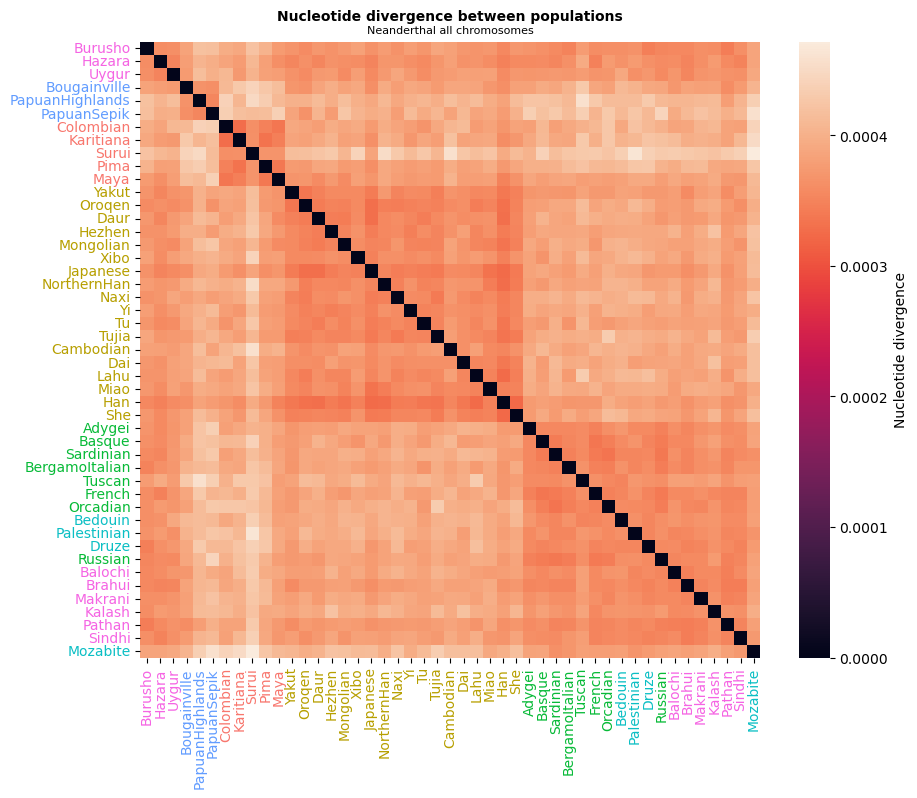

In [21]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
df.loc[df["pop1"] == df['pop2'], "div_neanderthal"] = 0

result = df.pivot(index='pop1',columns='pop2',values='div_neanderthal')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True,cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Neanderthal all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.savefig('../script_results/plots/div_Neanderthal_all_heatmap.png')

In [29]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
df.loc[df["pop1"] == df['pop2'], "norm_div_neanderthal"] = 0

result = df.pivot(index='pop1',columns='pop2',values='norm_div_neanderthal')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Neanderthal all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.savefig('../script_results/plots/div_Neanderthal_all_heatmap.png')

ValueError: Index contains duplicate entries, cannot reshape

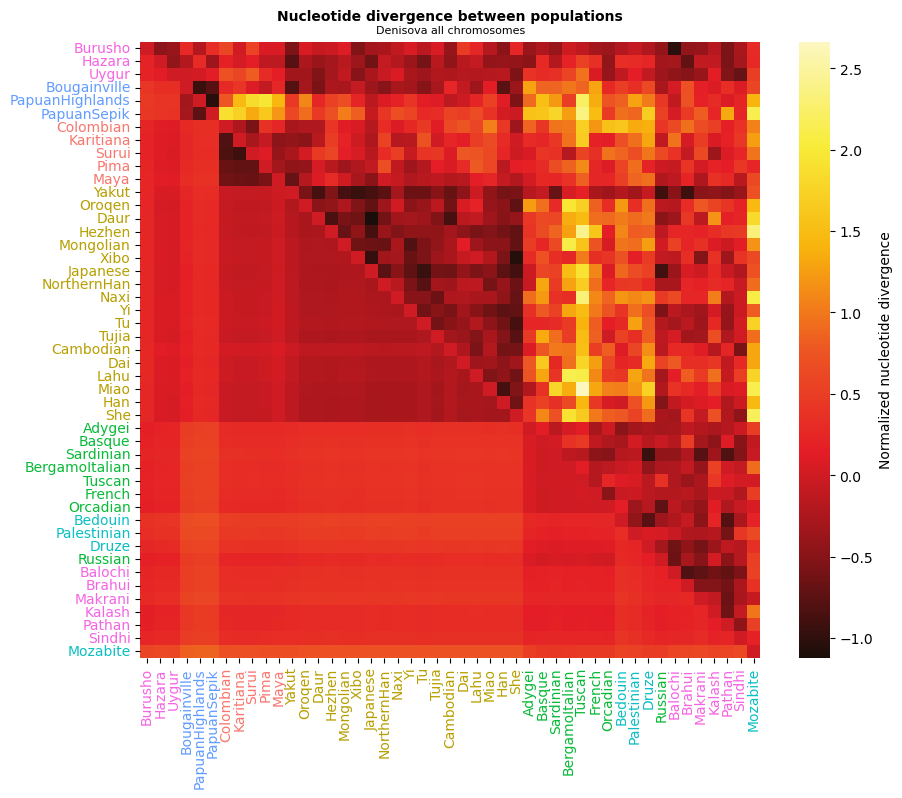

In [286]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#rslt_df = df[df['div_denisova'] <6e-05]
df.loc[df["pop1"] == df['pop2'], "norm_div_denisova"] = 0

result = df.pivot(index='pop1',columns='pop2',values='norm_div_denisova')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, axs = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Denisova all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('../script_results/plots/div_Denisova_all_heatmap.png')

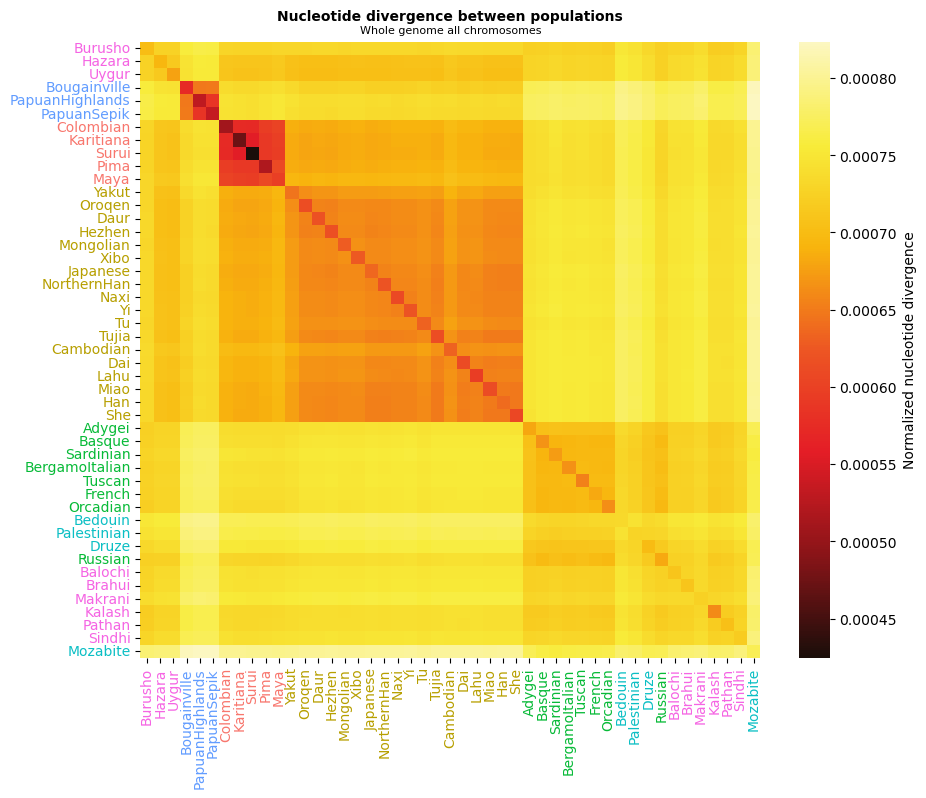

In [24]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#df.loc[df["pop1"] == df['pop2'], "div_whole_genome"] = 0

result = df.pivot(index='pop1',columns='pop2',values='div_whole_genome')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Whole genome all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('../script_results/plots/div_whole_genome_all_heatmap.png')

In [145]:
metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == 'HGDP']
metadata = metadata[metadata['reg'] != 'AFR']
pop_count = {}
for pop in metadata['pop']:
    if pop not in pop_count:
        pop_count[pop] = 1
    else:
        pop_count[pop] += 1 
pop_count
#metadata.query('pop == "Burusho"')

{'Brahui': 25,
 'Balochi': 24,
 'Hazara': 19,
 'Makrani': 25,
 'Sindhi': 24,
 'Pathan': 24,
 'Kalash': 22,
 'Burusho': 24,
 'Bougainville': 11,
 'French': 28,
 'PapuanSepik': 8,
 'PapuanHighlands': 9,
 'Druze': 42,
 'Bedouin': 46,
 'Sardinian': 28,
 'Palestinian': 46,
 'Colombian': 7,
 'Cambodian': 9,
 'Japanese': 27,
 'Han': 33,
 'Orcadian': 15,
 'Surui': 8,
 'Maya': 21,
 'Russian': 25,
 'Yakut': 25,
 'Karitiana': 12,
 'Pima': 13,
 'Tujia': 9,
 'BergamoItalian': 12,
 'Tuscan': 8,
 'Yi': 10,
 'Miao': 10,
 'Oroqen': 9,
 'Daur': 9,
 'Mongolian': 9,
 'Hezhen': 9,
 'Xibo': 9,
 'Mozabite': 27,
 'NorthernHan': 10,
 'Uygur': 10,
 'Dai': 9,
 'Lahu': 8,
 'She': 10,
 'Naxi': 8,
 'Tu': 10,
 'Basque': 23,
 'Adygei': 16}

In [155]:
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

print(list(sorted(pop_count.items(), key=lambda pair: column_order.index(pair[0]))))


[('Burusho', 24), ('Hazara', 19), ('Uygur', 10), ('Bougainville', 11), ('PapuanHighlands', 9), ('PapuanSepik', 8), ('Colombian', 7), ('Karitiana', 12), ('Surui', 8), ('Pima', 13), ('Maya', 21), ('Yakut', 25), ('Oroqen', 9), ('Daur', 9), ('Hezhen', 9), ('Mongolian', 9), ('Xibo', 9), ('Japanese', 27), ('NorthernHan', 10), ('Naxi', 8), ('Yi', 10), ('Tu', 10), ('Tujia', 9), ('Cambodian', 9), ('Dai', 9), ('Lahu', 8), ('Miao', 10), ('Han', 33), ('She', 10), ('Adygei', 16), ('Basque', 23), ('Sardinian', 28), ('BergamoItalian', 12), ('Tuscan', 8), ('French', 28), ('Orcadian', 15), ('Bedouin', 46), ('Palestinian', 46), ('Druze', 42), ('Russian', 25), ('Balochi', 24), ('Brahui', 25), ('Makrani', 25), ('Kalash', 22), ('Pathan', 24), ('Sindhi', 24), ('Mozabite', 27)]


In [137]:
sortednames=sorted(pop_count.keys(), key=lambda x:x.lower())
names_list = []
for i in sortednames:
    values=pop_count[i]
    print('{} ({})'.format(i,values))

Adygei (16)
Balochi (24)
BantuKenya (11)
BantuSouthAfrica (8)
Basque (23)
Bedouin (46)
BergamoItalian (12)
Biaka (22)
Bougainville (11)
Brahui (25)
Burusho (24)
Cambodian (9)
Colombian (7)
Dai (9)
Daur (9)
Druze (42)
French (28)
Han (33)
Hazara (19)
Hezhen (9)
Japanese (27)
Kalash (22)
Karitiana (12)
Lahu (8)
Makrani (25)
Mandenka (22)
Maya (21)
Mbuti (13)
Miao (10)
Mongolian (9)
Mozabite (27)
Naxi (8)
NorthernHan (10)
Orcadian (15)
Oroqen (9)
Palestinian (46)
PapuanHighlands (9)
PapuanSepik (8)
Pathan (24)
Pima (13)
Russian (25)
San (6)
Sardinian (28)
She (10)
Sindhi (24)
Surui (8)
Tu (10)
Tujia (9)
Tuscan (8)
Uygur (10)
Xibo (9)
Yakut (25)
Yi (10)
Yoruba (22)


In [158]:
div_whole_genome = pd.read_csv("../script_results/tables/div_Human_all.txt",sep='\t',header=None)
div_whole_genome.columns = ['pop1','pop2','mpd_whole_genome']
div_whole_genome = div_whole_genome.groupby(['pop1','pop2'])['mpd_whole_genome'].sum().reset_index()
div_whole_genome    

pop1            pop2  mpd_whole_genome
0     Adygei          Adygei      1.533859e+06
1     Adygei         Balochi      1.627732e+06
2     Adygei          Basque      1.587798e+06
3     Adygei         Bedouin      1.655028e+06
4     Adygei  BergamoItalian      1.588550e+06
...      ...             ...               ...
2204      Yi          Tuscan      1.698609e+06
2205      Yi           Uygur      1.586132e+06
2206      Yi            Xibo      1.495455e+06
2207      Yi           Yakut      1.524570e+06
2208      Yi              Yi      1.397873e+06

[2209 rows x 3 columns]

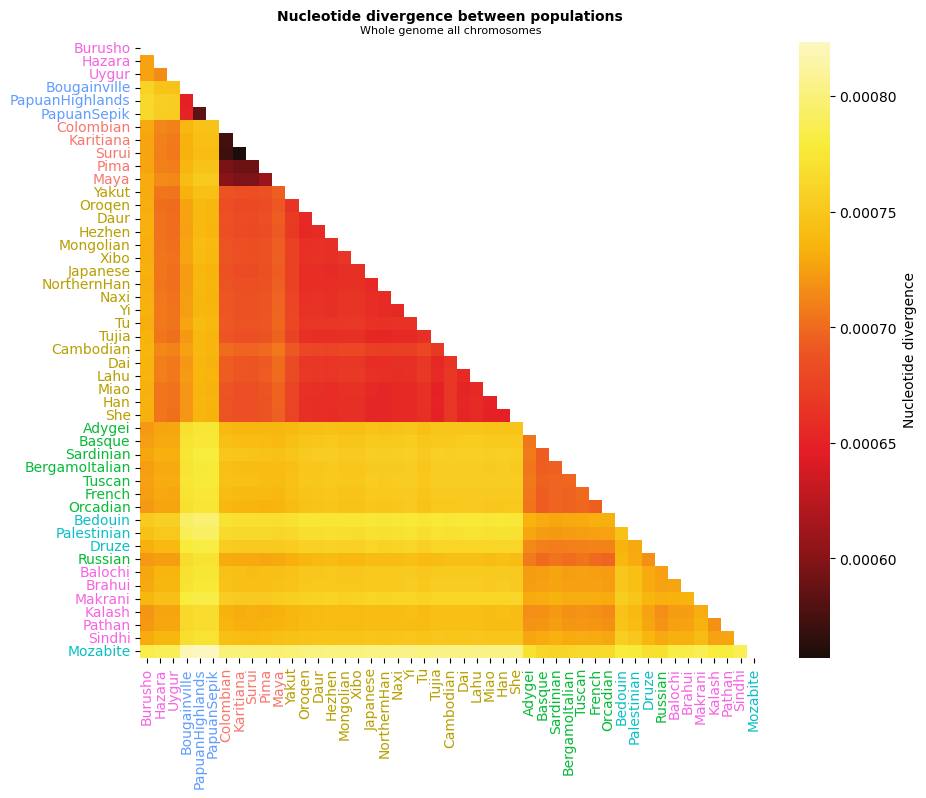

In [179]:

df = div_whole_genome
#df.loc[df["pop1"] == df['pop2'], "mpd"] = 0
df['div_whole_genome'] = df['mpd_whole_genome'] / 2252286208
corr= df.pivot(index='pop1',columns='pop2',values='div_whole_genome')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = corr[column_order][row_order]
table4 = table3.reindex(row_order)
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(table4)
#matrix[np.diag_indices_from(matrix)] = False

# using the upper triangle matrix as mask 
fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4, annot=False, mask=matrix,xticklabels=True,yticklabels=True,cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Whole genome all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    


In [178]:
div_whole_genome = pd.read_csv("../script_results/tables/div_Human_all.txt",sep='\t',header=None)
div_whole_genome.columns = ['pop1','pop2','mpd_whole_genome']
div_whole_genome = div_whole_genome.groupby(['pop1','pop2'])['mpd_whole_genome'].sum().reset_index()


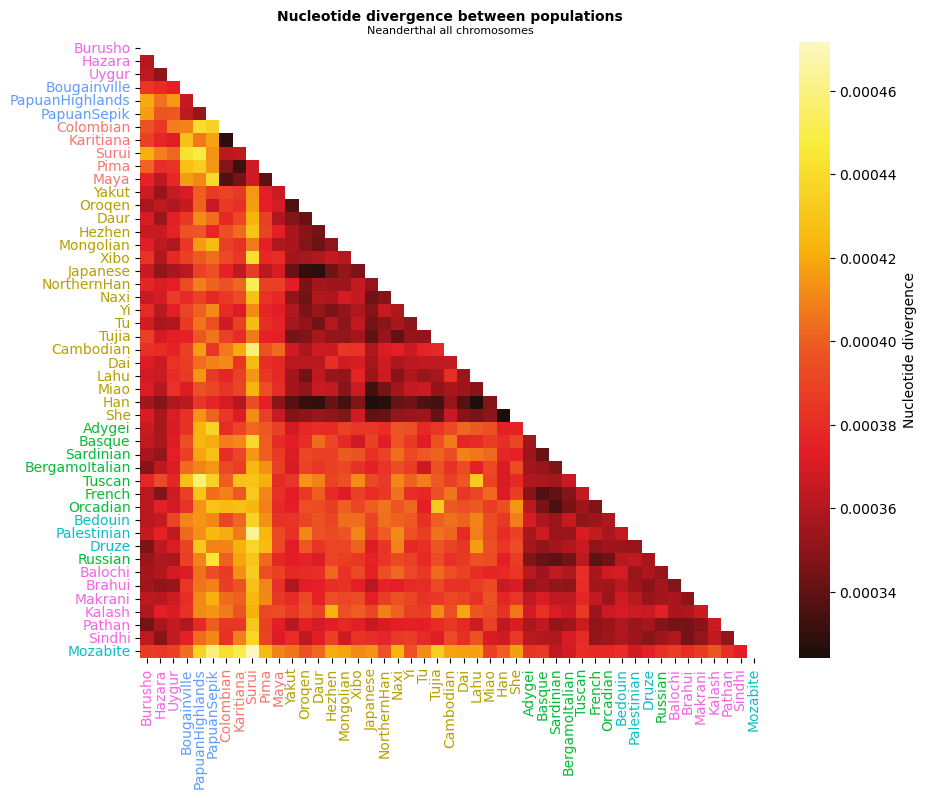

In [171]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#df['div_neanderthal'] = df['mpd_neanderthal'] / df['nean_int_total_seq_len']

corr= df.pivot(index='pop1',columns='pop2',values='div_neanderthal')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = corr[column_order][row_order]
table4 = table3.reindex(row_order)
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(table4)
#matrix[np.diag_indices_from(matrix)] = False

# using the upper triangle matrix as mask 
fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4, annot=False, mask=matrix,xticklabels=True,yticklabels=True,cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Neanderthal all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    


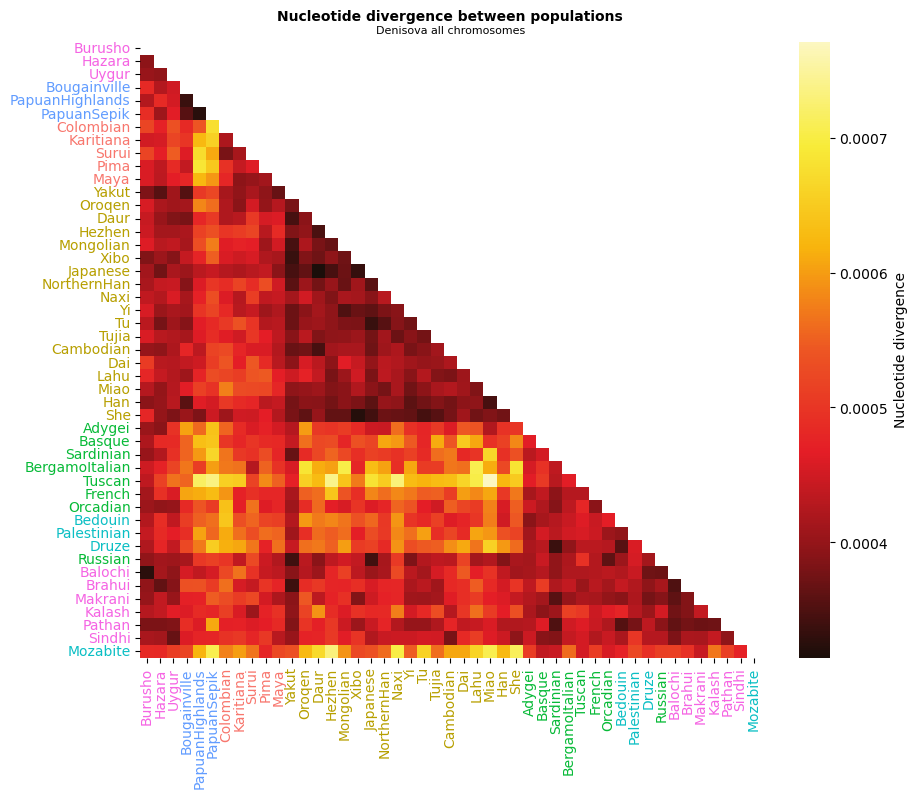

In [172]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')

corr= df.pivot(index='pop1',columns='pop2',values='div_denisova')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = corr[column_order][row_order]
table4 = table3.reindex(row_order)
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(table4)
#matrix[np.diag_indices_from(matrix)] = False

# using the upper triangle matrix as mask 
fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4, annot=False, mask=matrix,xticklabels=True,yticklabels=True,cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Denisova all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
